<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: **12/16/2020 11:30AM**
* Instructor name: **JEFF HERMAN**
* Blog post URL: https://baotramduong.medium.com/data-science-vs-the-movie-industry-8e5645d1c88c


# **Part III: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

**Question 1:** Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

        2.1  Budget vs. Worldwide Profit
        
             2.1a. Budget
             
                   2.1ai. General trend
                   2.1aii. Top 100 performers trend
                   
             2.1b. Profit
                    
                    2.1bi. Domestic Profit, International Profit, Worldwide Profit
                    2.1bii. Top 100 performers with respect to Worldwide Profit
                    
**Question 2:** What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

        2.2  Genre vs. Worldwide Profit
        
             2.2a. General distribution vs. Top 100 distribution
             2.2b. Top 100 performers vs. Worldwide Profit
             2.2c. Top 100 performers with respect to Production Budget and Worldwide Profit
             
        2.3  Source vs. Worldwide Profit
        
             2.3a. General distribution vs. Top 100 distribution
             2.3b. Top 100 performers vs. Worldwide Profit
             2.3c. Top 100 performers with respect to Production Budget and Worldwide Profit

        2.4  Creative Type vs. Worldwide Profit
        
             2.4a. General distribution vs. Top 100 distribution
             2.4b. Top 100 performers vs. Worldwide Profit
             2.4c. Top 100 performers with respect to Production Budget and Worldwide Profit
             
        2.5  Production Method vs. Worldwide Profit
        
             2.5a. General distribution vs. Top 100 distribution
             2.5b. Top 100 performers vs. Worldwide Profit
             2.5c Top 100 performers with respect to Production Budget and Worldwide Profit
             
**Question 3:** Can popularity or words of mouth, in term of rating and number of votes, and the popularity of a studio affect the performance of a movie?

        2.6. Popularity vs. Worldwide Profit
            
            2.6a. General distribution vs. Top 100 distribution
            2.6b. Genres with respect to Popularity & Worldwide Profit
            2.6c. Sources with respect to Popularity & Worldwide Profit
            2.6d. Creative Types with respect to Popularity & Worldwide Profit
            2.6e. Production Method with respect to Popularity & Worldwide Profit
        
        2.7. Rating & number of votes vs. Worldwide Profit
            
            2.7a. General distribution vs. Top 100 distribution
            2.7b. Genres with respect to Average Rating & Worldwide Profit
            2.7c. Sources with respect to Average Rating & Worldwide Profit
            2.7d. Creative Types with respect to Average Rating & Worldwide Profit
            2.7e. Production Method with respect to Average Rating & Worldwide Profit                            


# **1. INTRODUCTION**

## **1.1 Business Statement**

**Q1.** Is there a correlation between **production budget** and **profit**? If so, how much should Microsoft invest into production?

**Q2.** What kind of movie contents, in terms of **genre**, **source**, **creative type**, **production method**, perform the best?

**Q3.** Is there a correlation between **popularity** and **positive words of mouth (average rating)** and profit? How do they affect the performance of a movie?

**Q4.** When is the best time of year to **release** a movie?

**Q5.** Is there a correlation between **runtime** and profit? What is the best runtime?


# **2. DATA VISUALIZATION**

### **Methodology:**
Now we will use plots and tables to observe the relationship between the features: production budget, genre, source, creative type, production method, release month, and runtime to help us determine what kind of movies that Microsoft should make.

We split our dataset into 2 groups:
* The General Movies group contains all 625 movies in the dataset.
* The Top 100 Movies group contains the top 100 movies that generate the highest worldwide profit.

We will compare and contrast these 2 groups to see where they are aligned and where they are not, especially to observe what the Top 100 Movies are doing differently to set themselves apart. The general structure of the examination and analysis is:

1. Get the General Movies trend/ distribution using lineplot, barplot, distplot
2. Get the Top 100 Movies trend/ distribution using lineplot, barplot, distplot
3. Examine if there is a correlation/ linear relationship between variables and calculate the Pearson correlation coefficient
4. Do analysis on the five-number statistics of each of the category of a feature of the Top 100 Movies group in terms of worldwide profit to see which category performs the i.e for Genre feature, which among Action, Adventure, Thriller/Suspense, Drama, Musical etc. performs the best, using boxplot and swarmplot
5. See where the selected winner is positioned itself as compared to the General Movies using relplot.

## Display the full dataset

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

In [148]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [149]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production?

### Production Budget 

Looking at the distribution plot for production budget of all 625 movies (2010–2018), we see that the mean average budget for a movie is 68M.

In [150]:
#production_budget distribution for all movies
y_values = full_df['production_budget'].sort_values(ascending=False)
x_values = y_values.index

#remove scientific notation
y_values.describe().apply(lambda x: format(x, 'f'))

count          629.000000
mean      68086486.486486
std       61577082.023022
min         100000.000000
25%       24000000.000000
50%       45000000.000000
75%       95000000.000000
max      365000000.000000
Name: production_budget, dtype: object

This is a huge range, it takes as low as $100,000 and as high as 365M to create a movie.

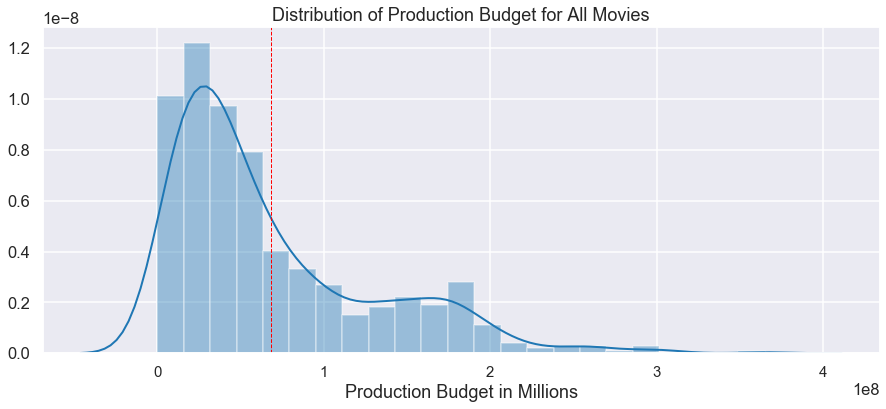

In [151]:
#plot production_budget for all movies
plt.figure(figsize = (15, 6))
sns.distplot(full_df['production_budget'], label = 'General')

#set labels
plt.title('Distribution of Production Budget for All Movies')
plt.xlabel('Production Budget in Millions')

#draw mean()
plt.axvline(full_df['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [152]:
#save
plt.savefig('production_budget_distribution_distplot')

<Figure size 432x288 with 0 Axes>

The recipe for a successful movie is pretty simple: small budget + massive ticket sales = huge profit. In the past few decades, Hollywood studios have sought to perfect the model. Unfortunately, in doing so, they have massively increased the cost of making and promoting such movies. Hence, when we think of the most successful movies at the box office, we think of the Hollywood blockbusters that costs huge budgets and exponentially takes in huge profits. 

Let's obtain a list of top 100 investment so we can later compare this list with top 100 performers and see if they match.

In [153]:
#list of top 100 investments
top_100_budget = full_df[['movie', 
                          'production_budget']].sort_values(by = 'production_budget', 
                                                            ascending = False)[:100]
top_100_budget.head(10)

,movie,production_budget
0,Avengers: Age of Ultron,365000000
3,Spectre,300000000
1,Avengers: Infinity War,300000000
2,Justice League,300000000
5,Solo: A Star Wars Story,275000000
6,John Carter,263700000
9,Batman v Superman: Dawn of Justice,263000000
7,Tangled,260000000
8,Captain America: Civil War,250000000
11,The Hobbit: The Desolation of Smaug,250000000


### Profit

Let's take a look at profits generated domestically, internationally, and worldwide.

In [154]:
full_df['worldwide_profit'].sort_values(ascending=False).describe().apply(lambda x: format(x, 'f'))

count           629.000000
mean      179070901.527822
std       231949428.442878
min       -63357202.000000
25%        41834418.000000
50%        91792744.000000
75%       208541369.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

Not all movies make profit as we can see there are losses (-63M).

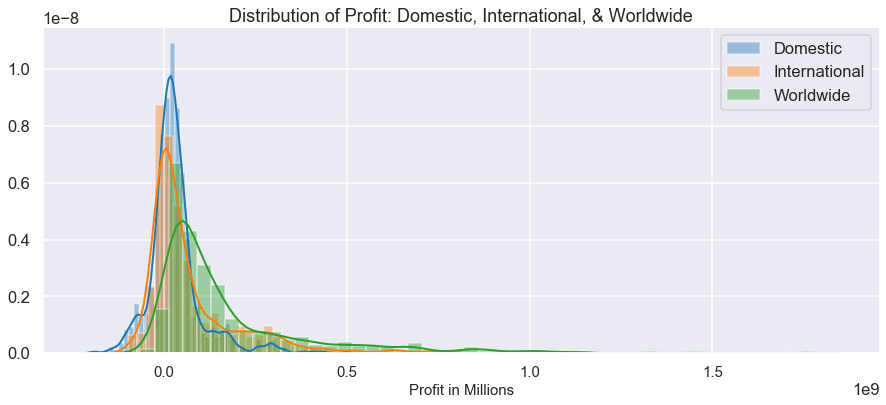

In [155]:
#plot distibution of profit
plt.figure(figsize = (15, 6))

#domestic profit
sns.distplot(full_df['domestic_profit'], label = 'Domestic')

#international profit
sns.distplot(full_df['international_profit'], label = 'International')

#worldwide profit
sns.distplot(full_df['worldwide_profit'], label = 'Worldwide')

#set labels
plt.legend()
plt.title('Distribution of Profit: Domestic, International, & Worldwide')
plt.xlabel('Profit in Millions', fontsize = 15)

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [156]:
#save
plt.savefig('profit_distribution_distplot')

<Figure size 432x288 with 0 Axes>

In [157]:
#comparing average 
print('The average domestic profit is', full_df['domestic_profit'].mean())
print('The average international profit is', full_df['international_profit'].mean())
print('The average worldwide_profit is', full_df['worldwide_profit'].mean())

The average domestic profit is 31620762.923688393
The average international profit is 79363652.11764705
The average worldwide_profit is 179070901.52782193


We are interested in worldwide_profit as this reflect the total profit earned. If we have more time, we can analyze each of the attribute with profit generated domestically vs. internationally to see if a movie performs better domestically than internationally and vice versa and why that is.

We can see here top 100 performers require a bigger budget. Their relationship can be assessed with a scatterplot: plot the value of variables on a scatter diagram, and check if the plot yields a relatively straight line:

<Figure size 1080x360 with 0 Axes>

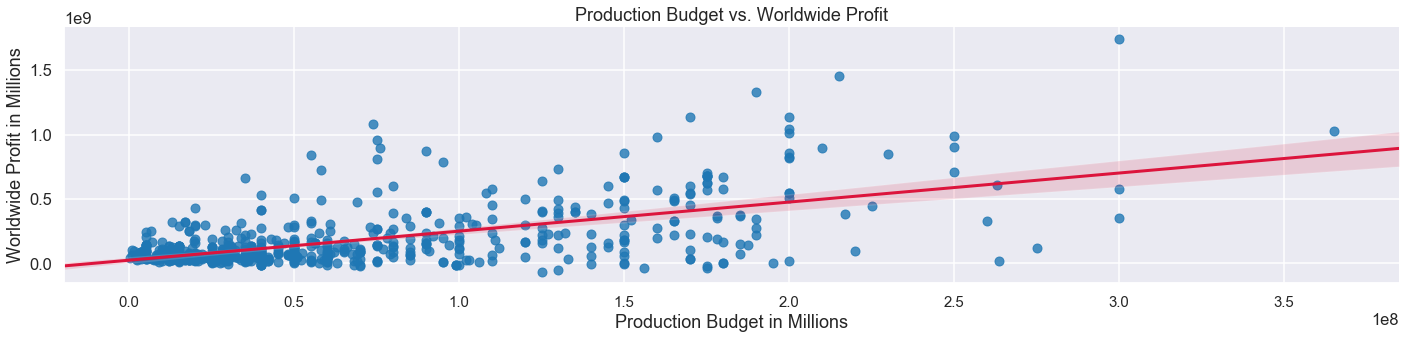

In [158]:
#plot 'production_budget' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'production_budget',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [159]:
#save
plt.savefig('budget_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

In [160]:
from scipy import stats

#get Pearson correlation coefficient of 'production_budget' vs. worldwide_profit'
#write r2 function
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

#get Pearson correlation coefficient
print('The Pearson correlation coefficient is:', r2(full_df['production_budget'], full_df['worldwide_profit']))

The Pearson correlation coefficient is: 0.35803770308410643


Looking at this regression line and coefficient, we see that there is a positive correlation between productin budget and worldwide profit. 

Now we need to look further into which minimum budget investment is required to really set our movie apart from the our competitors.

In [161]:
#list of top 100 performers
top_100_profit = full_df[['movie', 'worldwide_profit', 
                          'domestic_profit', 'international_profit', 'production_budget']].sort_values(by = 'worldwide_profit', 
                                                                                  ascending = False)[:100]
top_100_profit.head(10)

,movie,worldwide_profit,domestic_profit,international_profit,production_budget
1,Avengers: Infinity War,1744540523,378815482,1065725041,300000000
16,Jurassic World,1454943967,437270625,802673342,215000000
31,Furious 7,1327179709,163007020,974172689,190000000
59,Jurassic World: Fallen Kingdom,1138334005,247719760,720614245,170000000
21,Black Panther,1136498912,500059566,436439346,200000000
207,Minions,1085631140,262045770,749585370,74000000
22,Incredibles 2,1042805359,408581744,434223615,200000000
0,Avengers: Age of Ultron,1031099202,94005868,572093334,365000000
25,Iron Man 3,1015392272,208992272,606400000,200000000
12,The Fate of the Furious,986703796,-24235235,760939031,250000000


Comparing top_10_budget movies and top_10_profit movies, they are not the same list. For the first 20 movies, only 8 out of 20 top_budget movies made it into top_profit list. So higher investment into production does not necessarily always mean higher profit. This is why our r2-value is not very high. However, we can optimize our production budget to get the minimum requirement to achieve success. 

In [162]:
top_10_loss = full_df[['movie', 'release_date', 'worldwide_profit', 'production_budget']].sort_values(by = 'worldwide_profit', 
                                                                                  ascending = True)[:10]
top_10_loss.head(10)

,movie,release_date,worldwide_profit,production_budget
126,Monster Trucks,2017-01-13,-63357202,125000000
117,R.I.P.D.,2013-07-19,-50923322,130000000
57,King Arthur: Legend of the Sword,2017-05-12,-35369664,175000000
78,Deepwater Horizon,2016-09-30,-33396176,156000000
58,47 Ronin,2013-12-25,-23283185,175000000
216,The Finest Hours,2016-01-29,-20747239,70000000
20,Robin Hood,2018-11-21,-13789988,99000000
19,Robin Hood,2018-11-21,-13789988,99000000
18,Robin Hood,2018-11-21,-13789988,99000000
223,Downsizing,2017-12-22,-13537029,68000000


### Production Budget vs. Worldwide Profit

Let's look at how the top 100 performers do differently than the rest.

In [163]:
#create sub dataframe for production_budget and worldwide_profit of top 100 performers
budget_vs_100_profit = full_df[['movie', 'production_budget', 
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]
budget_vs_100_profit.head()

,movie,production_budget,worldwide_profit
1,Avengers: Infinity War,300000000,1744540523
16,Jurassic World,215000000,1454943967
31,Furious 7,190000000,1327179709
59,Jurassic World: Fallen Kingdom,170000000,1138334005
21,Black Panther,200000000,1136498912


In [164]:
#get descriptive statistics for 'worldwide_profit'
budget_vs_100_profit['worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count           100.000000
mean      624684416.280000
std       261615377.216910
min       337592267.000000
25%       423117551.750000
50%       552673193.000000
75%       728728907.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [165]:
#get descriptive statistics for 'worldwide_profit'
full_df['worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count           629.000000
mean      179070901.527822
std       231949428.442878
min       -63357202.000000
25%        41834418.000000
50%        91792744.000000
75%       208541369.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

* The average worldwide profit in General Movies group is 179M.
* The average worldwide profit of the Top 100 Movies group is 624M.

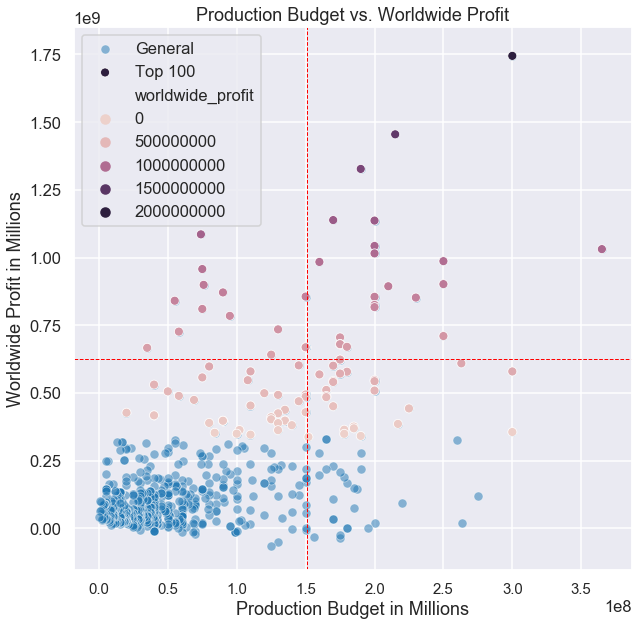

In [166]:
#plot 'production_budget' vs. 'worldwide_profit' for general trend and top 100 performers trend
plt.figure(figsize = (10, 10))

#general
sns.scatterplot(x = full_df['production_budget'], 
                      y = full_df['worldwide_profit'],
                      label = 'General', alpha = 0.5)
#top 100
sns.scatterplot(x = budget_vs_100_profit['production_budget'], 
                      y = budget_vs_100_profit['worldwide_profit'],
                      hue = budget_vs_100_profit['worldwide_profit'],
                      label = 'Top 100')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(budget_vs_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.legend(loc='upper left')
plt.title('Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [167]:
#save
plt.savefig('budget_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

We can see that many of the movies with smaller budgets provide studios with a big bang for their buck. 

In [168]:
#compare production_budget average 
print('The average production budget in general is', 
      full_df['production_budget'].mean(), 'dollars.')
print('The average production budget in top 100 performers is', 
      budget_vs_100_profit['production_budget'].mean(), 'dollars.')

The average production budget in general is 68086486.48648648 dollars.
The average production budget in top 100 performers is 150670000.0 dollars.


Let's visualize this difference:

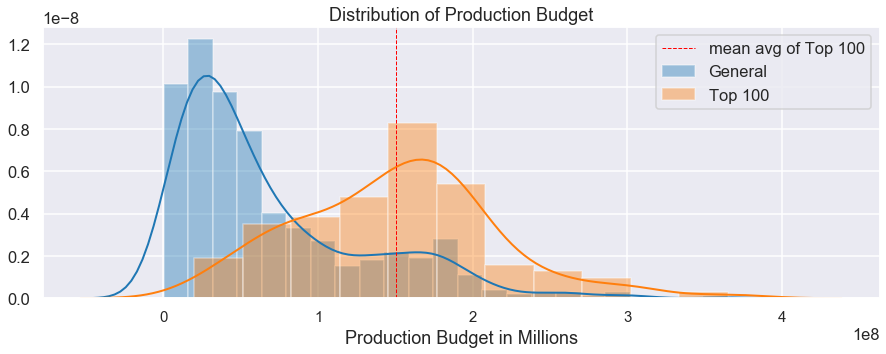

In [169]:
#distribution of 'production_budget' of all movies and top 100 performers
plt.figure(figsize = (15, 5))

#general
sns.distplot(full_df['production_budget'], label = 'General')

#top 100
sns.distplot(top_100_profit['production_budget'], label = 'Top 100')
plt.axvline(top_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'mean avg of Top 100')

#set labels
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget in Millions')
plt.legend()

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [170]:
#save
plt.savefig('budget_distribution_distplot')

<Figure size 432x288 with 0 Axes>

Here we see that:
* The average production budget in the General Movies group is 68M.
* The average production budget in Top 100 Movies group is 150M.

It is likely that the minimum budget requirement to create a movie is 150M, which is the mean average of top 100 performers' production budget. Let's investigate.

### Production Budget Range vs. Profit

In [171]:
#create sub dataframe for budget_range and worldwide_profit of top 100 performers
budget_range_vs_100_profit = full_df[['budget_range',
                                      'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                       ascending = False)[:100]
budget_range_vs_100_profit.head()

,budget_range,worldwide_profit
1,>200M,1744540523
16,>200M,1454943967
31,150-200M,1327179709
59,150-200M,1138334005
21,150-200M,1136498912


In [172]:
#check bins
budget_range_vs_100_profit['budget_range'].value_counts()

150-200M    36
100-150M    27
50-100M     18
>200M       13
<50M         6
Name: budget_range, dtype: int64

We can again see here the majority of top 100 performers invested within the $150-200M range. Let's create a visual plot for this:

The reason we use boxplot is because it is simple yet informative and they work extremely well when plotted next to each other to visualize many distributions at once.

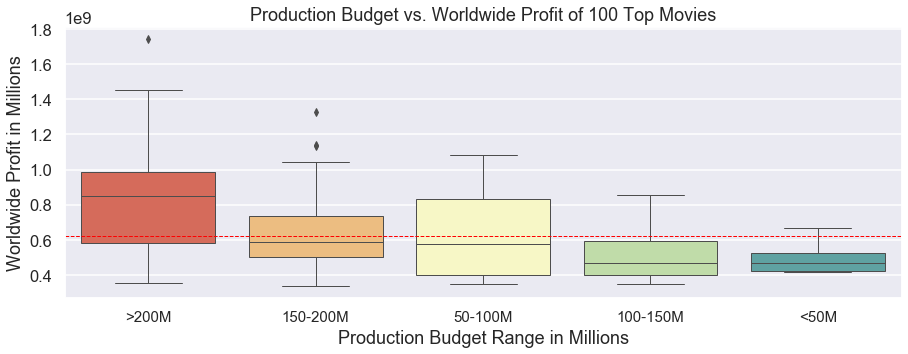

In [173]:
#set values
x_values = budget_range_vs_100_profit['budget_range']
y_values = budget_range_vs_100_profit['worldwide_profit']

#plot budget_range vs. worldwide_profit of the top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x_values, y_values, 
            linewidth = 1, palette = 'Spectral')

#draw mean()
plt.axhline(budget_range_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Production Budget vs. Worldwide Profit of 100 Top Movies')
plt.xlabel('Production Budget Range in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [174]:
#save 
plt.savefig('budget_range_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

We can see that the median between '150-200M' and '50-100M' are close. At this point, it seems a budget of minimum 50M is a good entry point. However, looking at '100-150M', it shows that the higher budget in this range is outperformed by the lower budget of '50-100M'. The '50-100M' data is also more spread out than '150-200M', making it less consistent and dependable, whereas '150-200M' produces consistently high worldwide profit.

With confidence, we recommend our production budget to be in 150M and up.

Let's use swarmplot to visualize where individual data points located specifically for each category. 

Swarmplot is categorical scatterplot.

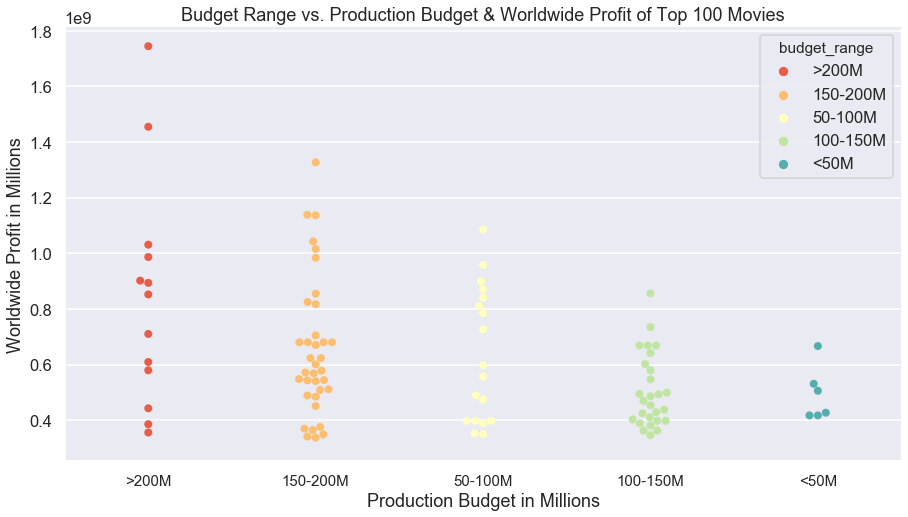

In [175]:
#plot all budget_range with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 8))
sns.swarmplot(x = 'budget_range',
            y = 'worldwide_profit',
            hue = 'budget_range',
            data = budget_range_vs_100_profit,
            s = 8, palette = 'Spectral')

#set labels
plt.title('Budget Range vs. Production Budget & Worldwide Profit of Top 100 Movies')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [176]:
#save
plt.savefig('production_budget_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

We can see that '150-200M' budget range is most common among top 100 performers.

Based on production budget alone, we recommend that our production budget for our future movie to be at least $150M.

## Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

### Genre

In [177]:
#genre_distribution values of all movies
y_values = full_df['genre'].value_counts(ascending=False)
x_values = y_values.index

y_values

Adventure              129
Comedy                 107
Action                 106
Drama                   96
Thriller/Suspense       78
Horror                  58
Romantic Comedy         22
Musical                 13
Black Comedy            12
Western                  5
Concert/Performance      3
Name: genre, dtype: int64

We can see here the movie industry is very Adventure-oriented as the majority of the movies made from 2010-2018 are in the Adventure genre. 

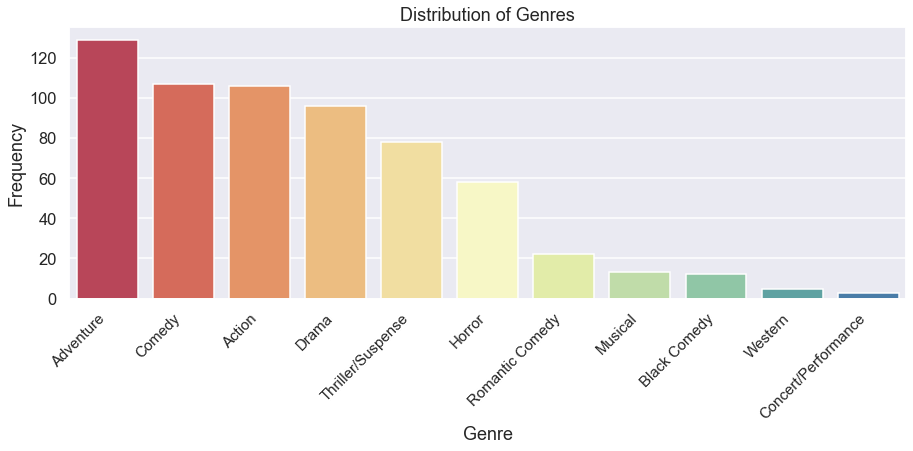

In [178]:
#plot genres distribution of the general dataset
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [179]:
#save
plt.savefig("genre_distribution_barplot")

<Figure size 432x288 with 0 Axes>

We see that Adventure, Comedy and Action are the most popular genres overall. Do the top 100 performers also follow this distribution?

In [180]:
#create sub dataframe 'genre' vs. 'worldwide_profit' of top 100 performers
genre_vs_100_profit = full_df[['movie', 'genre', 'production_budget',
                               'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                ascending = False)[:100]
genre_vs_100_profit.head(10)

,movie,genre,production_budget,worldwide_profit
1,Avengers: Infinity War,Action,300000000,1744540523
16,Jurassic World,Action,215000000,1454943967
31,Furious 7,Action,190000000,1327179709
59,Jurassic World: Fallen Kingdom,Action,170000000,1138334005
21,Black Panther,Action,200000000,1136498912
207,Minions,Adventure,74000000,1085631140
22,Incredibles 2,Adventure,200000000,1042805359
0,Avengers: Age of Ultron,Action,365000000,1031099202
25,Iron Man 3,Action,200000000,1015392272
12,The Fate of the Furious,Action,250000000,986703796


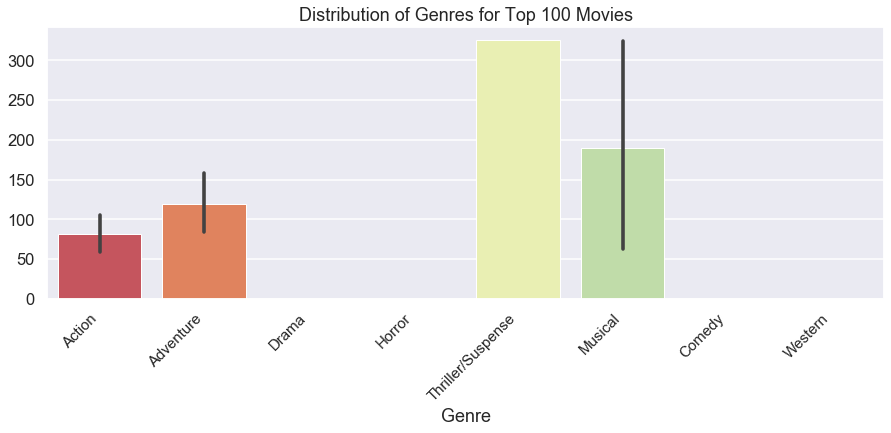

In [181]:
#plot 'genre' distribution of top 100 performers
x_values = genre_vs_100_profit['genre']
y_values = x_values.index

plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            linewidth = 1, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres for Top 100 Movies')
plt.xlabel('Genre')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [182]:
#save
plt.savefig('genre_distribution_100_barplot')

<Figure size 432x288 with 0 Axes>

Suprisingly, for Top 100 Movies, Thriller/ Suspense and Musical are the most popular genres. This is understandable since Thriller/Suspense is the genre that generates many ROI hits and a few misses.

Let's visualize this in term of genre vs. worldwide_profit:

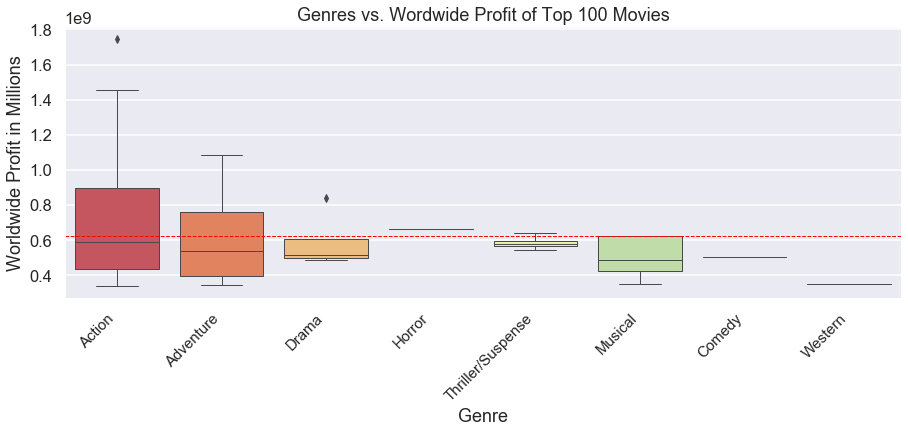

In [183]:
#plot 'genre' vs. 'worldwide_profit' of top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = genre_vs_100_profit['genre'], 
            y = genre_vs_100_profit['worldwide_profit'], 
            linewidth = 1,
            palette = 'Spectral')

#draw mean()
plt.axhline(genre_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genres vs. Wordwide Profit of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [184]:
#save
plt.savefig('genre_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

Although Thriller/Suspense is the most popular genre, Action and Adventure are our breadwinners.

In [185]:
#get descriptive statistics for 'Action' worldwide_gross
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Action', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count            40.000000
mean      692522437.025000
std       333842656.971351
min       337592267.000000
25%       436626582.500000
50%       590191577.500000
75%       896020184.250000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [186]:
#get descriptive statistics for 'Adventure' worldwide_profit
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Adventure', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))



count            43.000000
mean      591547316.209302
std       211174711.495649
min       346258539.000000
25%       397938302.000000
50%       540644566.000000
75%       759816592.000000
max      1085631140.000000
Name: worldwide_profit, dtype: object

In [187]:
#get descriptive statistics for 'Thriller/Suspense' worldwide_gross
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Thriller/Suspense', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count            5.000000
mean     587003473.400000
std       35616527.617819
min      547194200.000000
25%      568582465.000000
50%      579742192.000000
75%      597923379.000000
max      641575131.000000
Name: worldwide_profit, dtype: object

In [188]:
#get descriptive statistics for 'Musical' worldwide_gross
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Musical', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count            5.000000
mean     502627164.200000
std      119842313.810122
min      353137759.000000
25%      427182162.000000
50%      486155760.000000
75%      623330070.000000
max      623330070.000000
Name: worldwide_profit, dtype: object

* The average worldwide profit for Action genre is 692M.
* The average worldwide profit for Adventure genre is 591M.
* The average worldwide profit for Thriller/Suspense genre is 587M.
* The average worldwide for Musical genre is 502M.

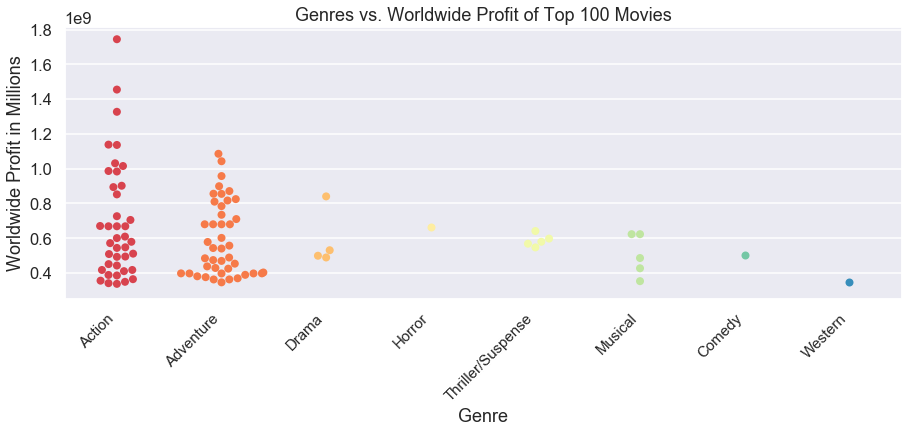

In [189]:
#plot all genres with respect to 'worldwide_gross' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'genre',
              y = 'worldwide_profit',
              hue = 'genre',
              data = genre_vs_100_profit,
              s = 8, palette = 'Spectral')

#set labels
plt.title('Genres vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [190]:
#save
plt.savefig('genre_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

Thriller/ Suspense might be more popular but Action and Adventure make more profits. We can see in the swarmplot that in term of worldwide profit, Action and Adventure have the 2 largest datasets.

Let's compare all genres in term of budget requirement.

In [191]:
#create sub dataframe 'genre' vs. 'production_budget' of top 100 performers
genre_vs_100_budget = full_df[['movie', 'genre', 
                               'production_budget']].sort_values(by = 'production_budget', 
                                                                 ascending = False)[:100]
genre_vs_100_budget.head()

,movie,genre,production_budget
0,Avengers: Age of Ultron,Action,365000000
3,Spectre,Action,300000000
1,Avengers: Infinity War,Action,300000000
2,Justice League,Action,300000000
5,Solo: A Star Wars Story,Adventure,275000000


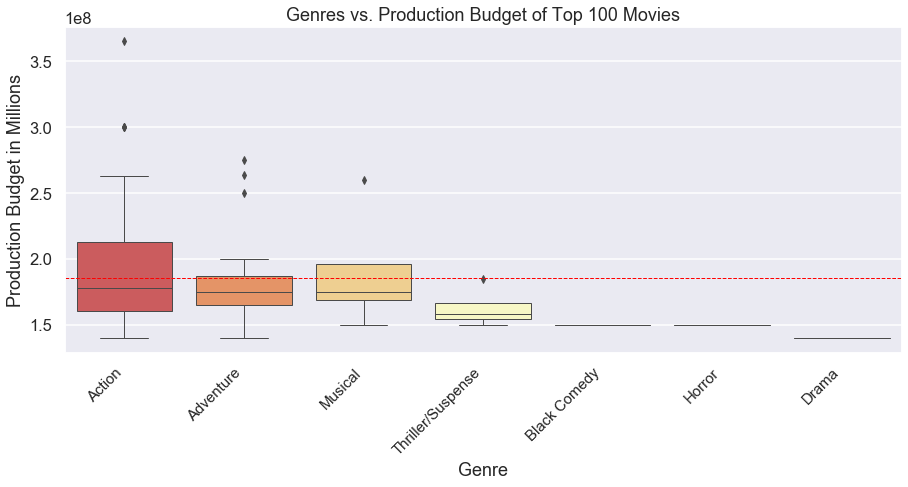

In [192]:
#plot 'genre' vs. 'production_budget' of top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_100_budget['genre'], 
            y = genre_vs_100_budget['production_budget'], 
            linewidth = 1,
            palette = 'Spectral')

#draw mean()
plt.axhline(genre_vs_100_budget['production_budget'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Genres vs. Production Budget of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Production Budget in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [193]:
#save
plt.savefig('genre_vs_100_budget_boxplot')

<Figure size 432x288 with 0 Axes>

Action/ Adventure movies are always those that make the big headlines with the record-breaking ticket sales. However, looking at this boxplot, we can see that their huge ticket sales are usually matched by huge budgets, which means that these movies bring in a lot of money, but not the best ROI.

For example, Deane (2019) found that Avatar has made over 2.7B, yet its ROI is "just" 500%, as compared to lower-budget action film Mad Max (1979), which returned 24,837.5%. Again, for the simplicity of this report, we only focus on simplified worldwide profit.

In [194]:
#get descriptive statistics for 'Action' production_budget
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Action', 'production_budget'].describe().apply(lambda x: format(x, 'f'))

count           40.000000
mean     186775000.000000
std       65958995.615186
min       40000000.000000
25%      151500000.000000
50%      178000000.000000
75%      215500000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [195]:
#get descriptive statistics for 'Adventure' production_budget
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Adventure', 'production_budget'].describe().apply(lambda x: format(x, 'f'))

count           43.000000
mean     138395348.837209
std       45923403.896822
min       69000000.000000
25%       92500000.000000
50%      135000000.000000
75%      175000000.000000
max      250000000.000000
Name: production_budget, dtype: object

In [196]:
#get descriptive statistics for 'Thriller/Suspense' production_budget
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Thriller/Suspense', 'production_budget'].describe().apply(lambda x: format(x, 'f'))

count            5.000000
mean     116600000.000000
std       29202739.597510
min       80000000.000000
25%      108000000.000000
50%      110000000.000000
75%      125000000.000000
max      160000000.000000
Name: production_budget, dtype: object

In [197]:
#get descriptive statistics for 'Musical' production_budget
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Musical', 'production_budget'].describe().apply(lambda x: format(x, 'f'))

count            5.000000
mean     120800000.000000
std       67532954.918321
min       20000000.000000
25%       84000000.000000
50%      150000000.000000
75%      175000000.000000
max      175000000.000000
Name: production_budget, dtype: object

It makes sense why Thriller/ Suspense are the most popular genre: their production budget is lower compared to Action and Adventure. Let's look at all of the genres together with respect to production budget and worldwide profit:

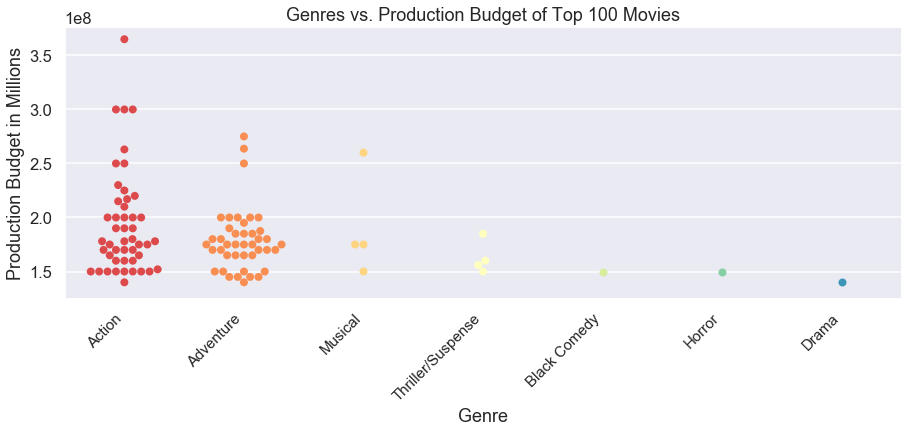

In [198]:
#plot all genres with respect to 'production_budget' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'genre',
            y = 'production_budget',
            hue = 'genre',
            data = genre_vs_100_budget,
            s = 8, palette = 'Spectral')

#set labels
plt.title('Genres vs. Production Budget of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Production Budget in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [199]:
#save
plt.savefig('genre_vs_100_budget_swarmplot')

<Figure size 432x288 with 0 Axes>

It also makes sense why Thriller/ Suspense are the most popular genre: their production budget is lower compared to Action and Adventure.

<Figure size 1080x1080 with 0 Axes>

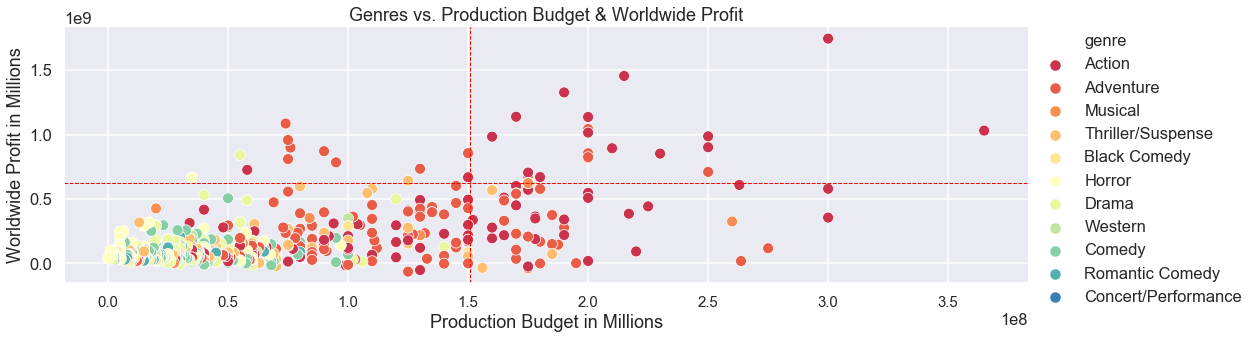

In [200]:
#plot all genres with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'genre',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(budget_vs_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genres vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [201]:
#save
plt.savefig('genre_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

We see that Action, Adventure are the most lucrative genres but also costs the most to create.  

For genres, we recommend that the next movie is a mix of Action and Adventure, which will cost us within the range of 150M and higher.

More importantly, we believe that it is more important to produce the right genre or movie content at the right time instead of just focusing solely on the profit. The movie culture reflects the pop culture and culture is changing all the time. For example, once upon a time, Disney princesses were rescued by knights in shining armor. Nowadays, with the female empowerment movement, a princess no longer needs a man to save her. Audience grew out of Cinderella (2015) or Sleeping Beauty (1959) and into Brave (2012), Mulan (2020), and Moana (2016). There is no 'right' formula or THE formula. Action/ Adventure/ Super Hero/ Animation/ Live Action might be what we start with but it won't be what we end up doing and we need to listen to the public by keeping track with popularity score, public rating, critics reviews.

A few mixed studies that demonstrate the forever changing taste of audiences are (Stimper, 2008):
* Litman (1983) only found science fiction and horror genres to be positively associated with movie revenues .
* Prag and Casavant (1994) found a negative association between dramas and box office success.
* Zufryden (1996) concluded that action movies are negatively associated with consumers‟ intentions to see a movie.
* Sawhney and Eliashberg (1996) reported that action movies are positively associated with attendance decisions, while dramas are negatively associated with attendance decisions.
* Other studies find action and horror movies positively associated with movie attendance, while adventure films and dramas are negatively associated with attendance.

We suggest Microsoft to create movies with diversity and cultural movement in mind i.e female directors, women of color, Black Lives Matter movement, LGBTQ, etc.

Now we are taking a look at Source, Creative Type, Production Method in correlation with Profit. Let's look at the distribution of each of these.

### Source

In [202]:
#source_distribution values
y_values = full_df['source'].value_counts(ascending=False)
x_values = y_values.index

y_values

Original Screenplay                    308
Based on Fiction Book/Short Story      106
Based on Comic/Graphic Novel            45
Based on Real Life Events               41
Based on Factual Book/Article           33
Based on TV                             22
Based on Folk Tale/Legend/Fairytale     19
Based on Short Film                     13
Based on Game                           11
Remake                                  11
Spin-Off                                 9
Based on Religious Text                  4
Based on Play                            3
Based on Toy                             2
Based on Musical or Opera                2
Name: source, dtype: int64

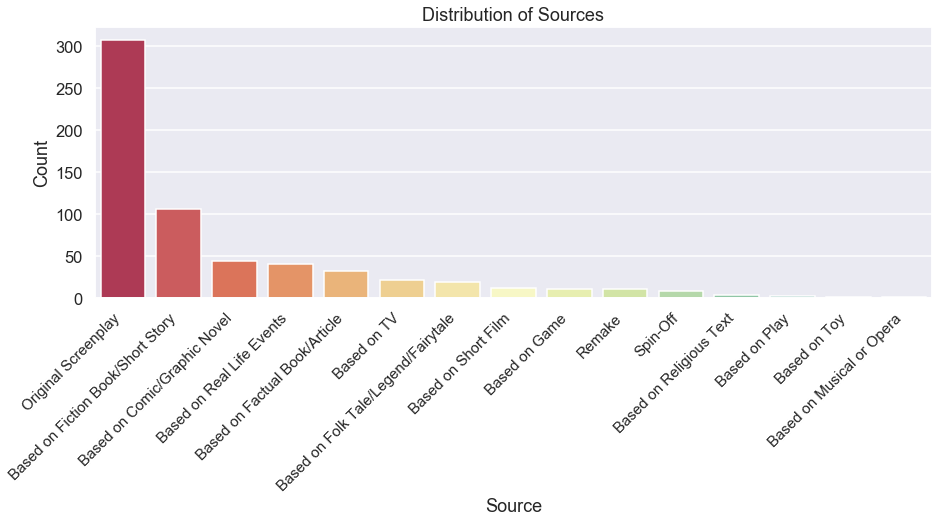

In [203]:
#plot distribution of 'source' for all movies
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Sources')
plt.xlabel('Source')
plt.ylabel('Count')

#set xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

#show
plt.show()

In [204]:
#save
plt.savefig('source_distribution_barplot')

<Figure size 432x288 with 0 Axes>

We see that in the General Movies group, Original Screenplay and Fictional Book/ Short Story are the most popular. But just because they're popular sources doesn't mean that they generate the highest profit. Let's see which one performs the best by taking a look at the source distribution for Top 100 Movies group.

In [205]:
#create sub dataset for 'source' and 'worldwide_profit' for top 100 performers
source_vs_100_profit = full_df[['movie', 'source', 'production_budget',
                               'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                ascending = False)[:100]
source_vs_100_profit.head()

,movie,source,production_budget,worldwide_profit
1,Avengers: Infinity War,Based on Comic/Graphic Novel,300000000,1744540523
16,Jurassic World,Based on Fiction Book/Short Story,215000000,1454943967
31,Furious 7,Original Screenplay,190000000,1327179709
59,Jurassic World: Fallen Kingdom,Based on Fiction Book/Short Story,170000000,1138334005
21,Black Panther,Based on Comic/Graphic Novel,200000000,1136498912


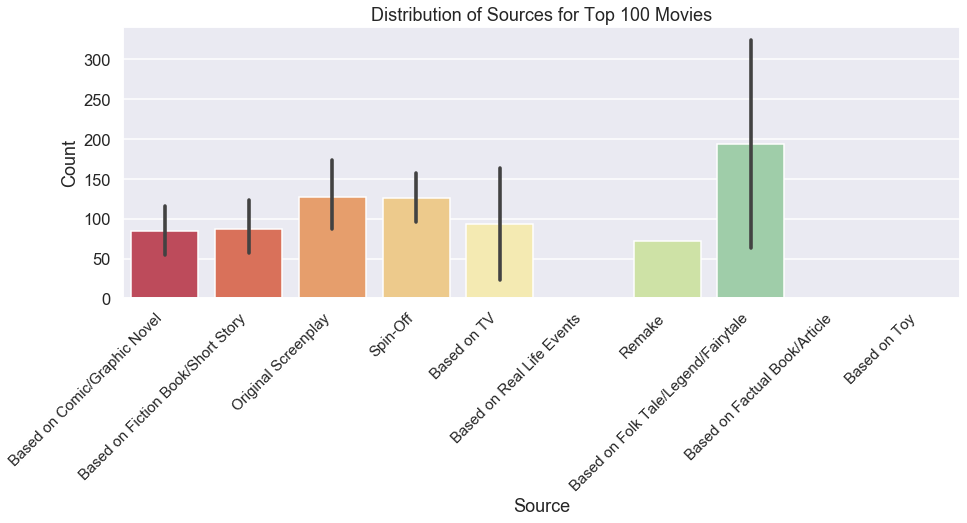

In [206]:
#plot 'source' distribution of top 100 performers
x_values = source_vs_100_profit['source']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Sources for Top 100 Movies')
plt.xlabel('Source')
plt.ylabel('Count')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [207]:
#save
plt.savefig('source_distribution_100_barplot')

<Figure size 432x288 with 0 Axes>

We can see here, again, by comparing the dataset with the distribution plot, just because movies based on Folk Tale/ Legend/ Fairytale is the most popular among top 100, they don't necessarily generate the highest profit. Let's look at this feature in term of worldwide_profit.

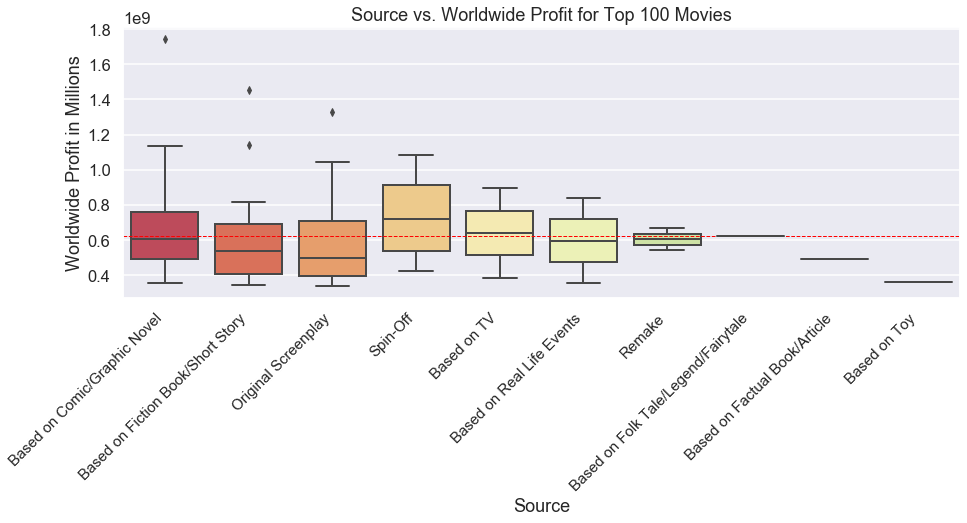

In [208]:
#plot 'source' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = source_vs_100_profit['source'], 
            y = source_vs_100_profit['worldwide_profit'], 
            palette = 'Spectral')

#draw mean()
plt.axhline(source_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Source vs. Worldwide Profit for Top 100 Movies')
plt.xlabel('Source')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

#show
plt.show()

In [209]:
#save
plt.savefig('soure_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

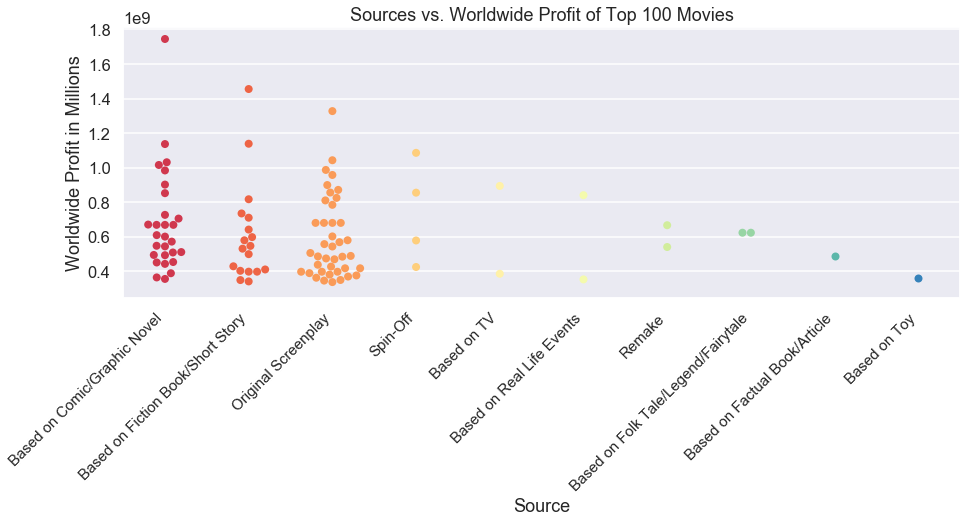

In [210]:
#plot all sources with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'source',
            y = 'worldwide_profit',
            hue = 'source',
            data = source_vs_100_profit,
            s = 8, palette = 'Spectral',)

#set labels
plt.title('Sources vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Source')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [211]:
#save
plt.savefig('source_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

Spin-Off median is the highest but when we look at the data point individually, Spin-Off has very little data and they are very dispersed and inconsistent.

In [212]:
#get descriptive statistics for 'Based on Comic/Graphic Novel' worldwide_gross
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Based on Comic/Graphic Novel', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            28.000000
mean      682638590.285714
std       297298960.741626
min       355945209.000000
25%       494238052.000000
50%       605138743.000000
75%       758068922.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [213]:
#get descriptive statistics for 'Based on Fiction Book/Short Story' worldwide_gross
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Based on Fiction Book/Short Story', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            18.000000
mean      610074256.333333
std       290168274.513361
min       341514650.000000
25%       404890312.750000
50%       539096150.500000
75%       693072348.000000
max      1454943967.000000
Name: worldwide_profit, dtype: object

In [214]:
#get descriptive statistics for 'Original Screenplay' worldwide_gross
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Original Screenplay', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            40.000000
mean      591216459.250000
std       235462003.972408
min       337592267.000000
25%       397519809.000000
50%       497567193.000000
75%       706348936.500000
max      1327179709.000000
Name: worldwide_profit, dtype: object

* The average worldwide profit for Based on Comic/Graphic Novel source is 682M.
* The average worldwide profit for Based on Fiction Book/Short Story source is 610M.
* The average worldwide profit for Original Screenplay source is 591M.

<Figure size 1080x1080 with 0 Axes>

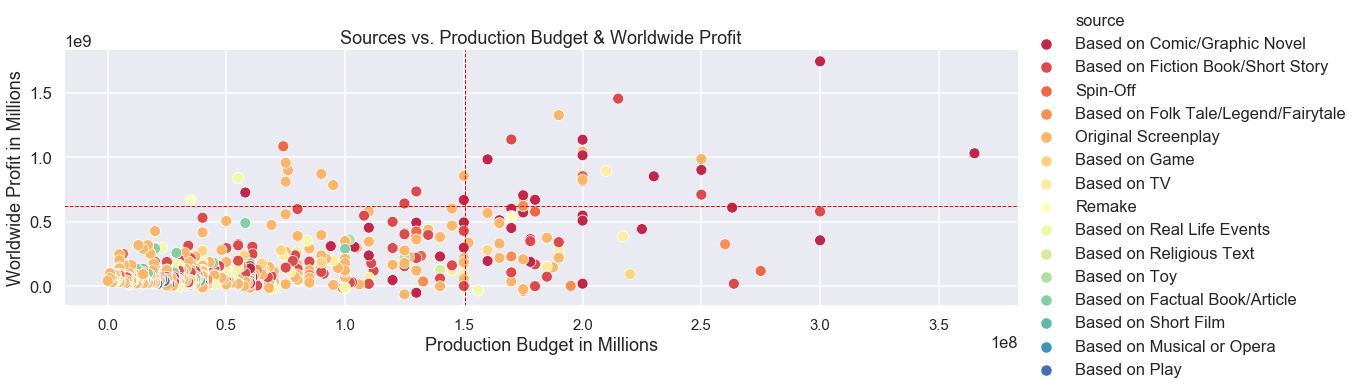

In [215]:
#plot all 'source' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'source',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(budget_vs_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Sources vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [216]:
#save
plt.savefig('source_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [217]:
#get descriptive statistics for 'Adventure' production_budget
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Based on Comic/Graphic Novel', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           28.000000
mean     189428571.428571
std       63190733.363910
min       58000000.000000
25%      150000000.000000
50%      175000000.000000
75%      206250000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [218]:
#get descriptive statistics for 'Adventure' worldwide_profit
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Based on Comic/Graphic Novel', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            28.000000
mean      682638590.285714
std       297298960.741626
min       355945209.000000
25%       494238052.000000
50%       605138743.000000
75%       758068922.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

For source, we recommend that our movie is to based on Comic/ Graphic Novel or Fiction Book/ Short Story, which will cost us 189M on average. This makes sense when our recommended genres are Action and Adventure. Superhero movies are doing very well.

### Creative Type

Let's look at 'creative_type' for General Movies group:

In [219]:
#creative_type values
y_values = full_df['creative_type'].value_counts(ascending = False)
x_values = y_values.index

y_values

Contemporary Fiction       291
Kids Fiction                73
Science Fiction             67
Fantasy                     60
Dramatization               59
Historical Fiction          42
Super Hero                  33
Factual                      3
Multiple Creative Types      1
Name: creative_type, dtype: int64

Comtemporary Fiction is the most popular overall.

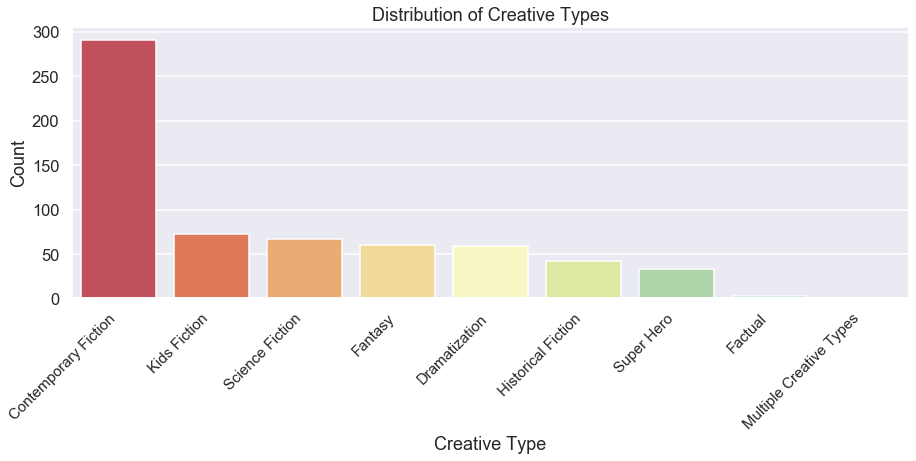

In [220]:
#plot 'creative_type' for all movies
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette='Spectral')

#set labels
plt.title('Distribution of Creative Types')
plt.xlabel('Creative Type')
plt.ylabel('Count')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [221]:
#save
plt.savefig('creative_type_distribution_barplot')

<Figure size 432x288 with 0 Axes>

Is this the same for top 100 performers?

In [222]:
#create sub dataset for 'creative_type' vs. 'worldwide_profit' for top 100 performers
creative_type_vs_100_profit = full_df[['movie', 'creative_type', 'production_budget',
                                       'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                        ascending = False)[:100]
creative_type_vs_100_profit.head(10)

,movie,creative_type,production_budget,worldwide_profit
1,Avengers: Infinity War,Super Hero,300000000,1744540523
16,Jurassic World,Science Fiction,215000000,1454943967
31,Furious 7,Contemporary Fiction,190000000,1327179709
59,Jurassic World: Fallen Kingdom,Science Fiction,170000000,1138334005
21,Black Panther,Super Hero,200000000,1136498912
207,Minions,Kids Fiction,74000000,1085631140
22,Incredibles 2,Kids Fiction,200000000,1042805359
0,Avengers: Age of Ultron,Super Hero,365000000,1031099202
25,Iron Man 3,Super Hero,200000000,1015392272
12,The Fate of the Furious,Contemporary Fiction,250000000,986703796


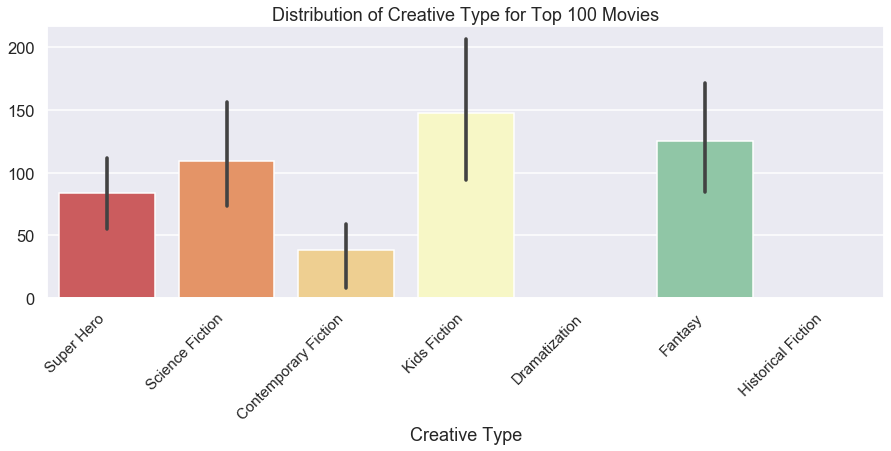

In [223]:
#plot distribution of 'creative_type' for top 100 performers
x_values = creative_type_vs_100_profit['creative_type']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Creative Type for Top 100 Movies')
plt.xlabel('Creative Type')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [224]:
#save
plt.savefig('creative_type_distribution_barplot_100')

<Figure size 432x288 with 0 Axes>

Now look at this in term of 'worldwide_profit'

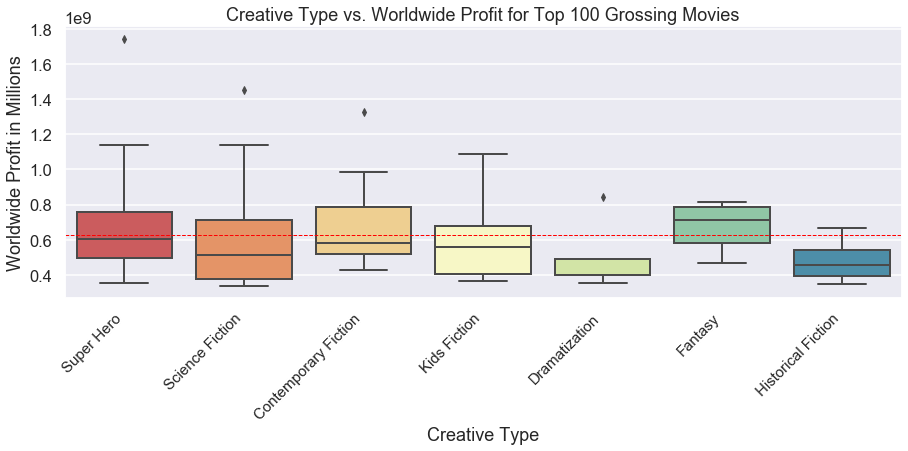

In [225]:
#plot 'creative_type' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = creative_type_vs_100_profit['creative_type'], 
            y = creative_type_vs_100_profit['worldwide_profit'],
            palette = 'Spectral')

#draw mean()
plt.axhline(creative_type_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Creative Type vs. Worldwide Profit for Top 100 Grossing Movies')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [226]:
#save
plt.savefig('creative_type_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

In [227]:
#get descriptive statistics for 'Super Hero' worldwide_gross
creative_type_vs_100_profit.loc[creative_type_vs_100_profit['creative_type'] == 'Super Hero', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            28.000000
mean      683743373.464286
std       296473219.673735
min       355945209.000000
25%       494238052.000000
50%       605138743.000000
75%       758068922.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [228]:
#get descriptive statistics for 'Science Fiction' worldwide_gross
creative_type_vs_100_profit.loc[creative_type_vs_100_profit['creative_type'] == 'Science Fiction', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            22.000000
mean      595344170.272727
std       292417021.473751
min       337592267.000000
25%       378527379.250000
50%       514881162.500000
75%       711544818.000000
max      1454943967.000000
Name: worldwide_profit, dtype: object

In [229]:
#get descriptive statistics for 'Contemporary Fiction' worldwide_gross
creative_type_vs_100_profit.loc[creative_type_vs_100_profit['creative_type'] == 'Contemporary Fiction', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count             7.000000
mean      705331906.714286
std       327861052.947806
min       427182162.000000
25%       518507364.000000
50%       579500760.000000
75%       783222994.000000
max      1327179709.000000
Name: worldwide_profit, dtype: object

* The average worldwide profit for Super Hero creative type is 683M.
* The average worldwide profit for Based on Science Fiction creative type is 595M.
* The average worldwide profit for Contemporary Fiction creative type is 705M.

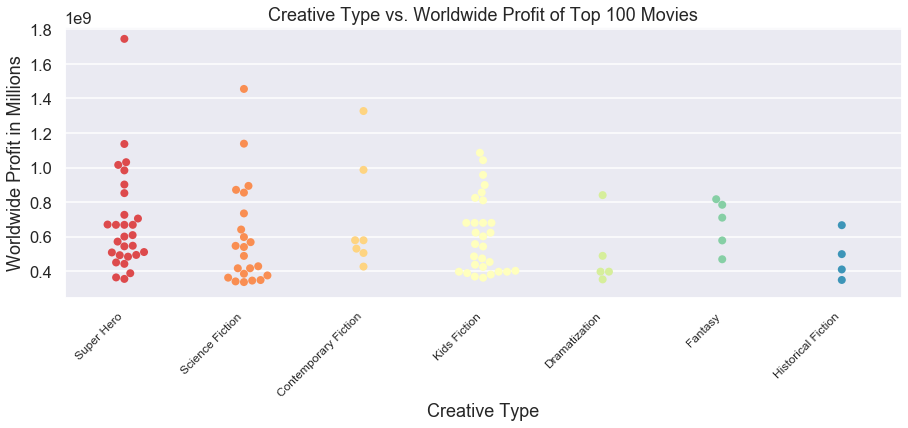

In [230]:
#plot all creative types with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'creative_type',
              y = 'worldwide_profit',
              hue = 'creative_type',
              data = creative_type_vs_100_profit,
              s = 8, palette = 'Spectral',)

#set labels
plt.title('Creative Type vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [231]:
#save
plt.savefig('creative_type_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

Looking at swarmplot and descriptive statistic, Contemporary Fiction generates higher worldwide profit (705M) than Super Hero and Science Fiction. We will later look at popularity and average rating to do further analysis on these 3 creative types.

<Figure size 1080x1080 with 0 Axes>

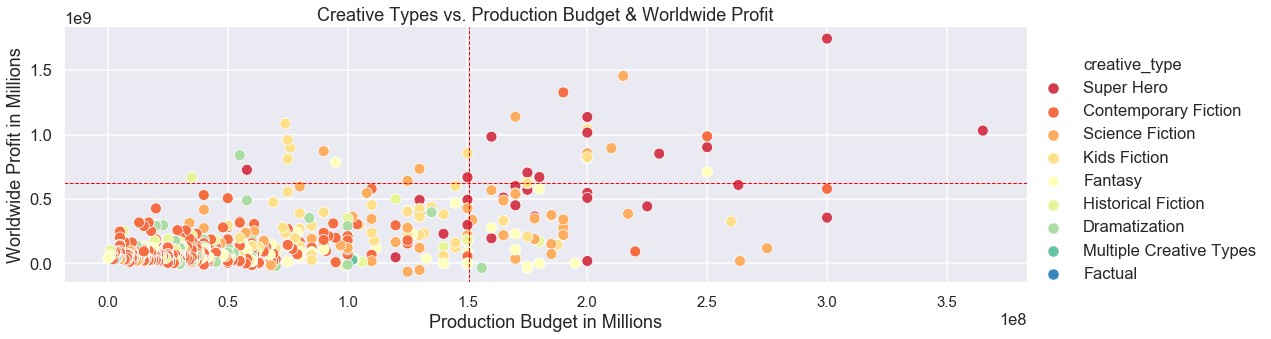

In [232]:
#plot all 'creative_type' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'creative_type',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(budget_vs_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Creative Types vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [233]:
#save
plt.savefig('creative_type_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

### Production Method

In [234]:
#production_method_distribution values for all movies
y_values = full_df['production_method'].value_counts(ascending = False)
x_values = y_values.index

y_values

Live Action              515
Digital Animation         57
Animation/Live Action     53
Stop-Motion Animation      4
Name: production_method, dtype: int64

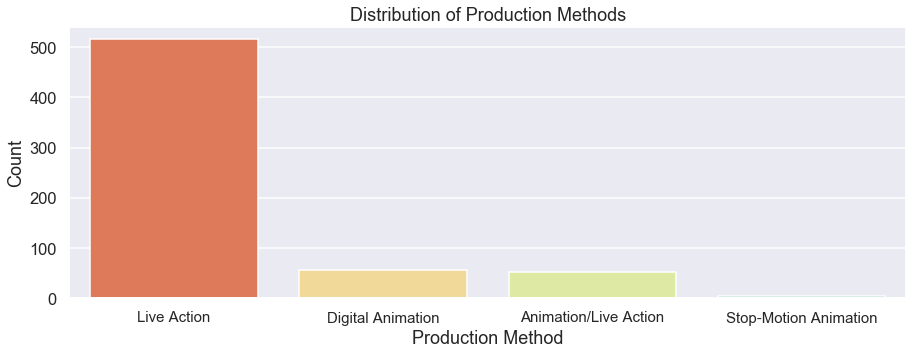

In [235]:
#plot distribution of 'production_method' for all movies
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Methods')
plt.xlabel('Production Method')
plt.ylabel('Count')

#setxticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [236]:
#save
plt.savefig('production_method_distribution_barplot.png')

<Figure size 432x288 with 0 Axes>

Now we look at our 100 winners.

In [237]:
#create sub dataset for 'production_method' vs. 'worldwide_profit' for top 100 performers
production_method_vs_100_profit = full_df[['movie', 'production_method', 'production_budget',
                                           'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                            ascending = False)[:100]
production_method_vs_100_profit.head(10)

,movie,production_method,production_budget,worldwide_profit
1,Avengers: Infinity War,Animation/Live Action,300000000,1744540523
16,Jurassic World,Live Action,215000000,1454943967
31,Furious 7,Live Action,190000000,1327179709
59,Jurassic World: Fallen Kingdom,Live Action,170000000,1138334005
21,Black Panther,Live Action,200000000,1136498912
207,Minions,Digital Animation,74000000,1085631140
22,Incredibles 2,Digital Animation,200000000,1042805359
0,Avengers: Age of Ultron,Animation/Live Action,365000000,1031099202
25,Iron Man 3,Animation/Live Action,200000000,1015392272
12,The Fate of the Furious,Live Action,250000000,986703796


In [238]:
production_method_vs_100_profit.describe()

,production_budget,worldwide_profit
count,1.000000e+02,1.000000e+02
mean,1.506700e+08,6.246844e+08
std,6.402336e+07,2.616154e+08
min,2.000000e+07,3.375923e+08
25%,1.065000e+08,4.231176e+08
50%,1.500000e+08,5.526732e+08
75%,1.850000e+08,7.287289e+08
max,3.650000e+08,1.744541e+09


For production method, general trend and top 100 performers are the same. Animation/ Live Action is it. Let's visualize this.

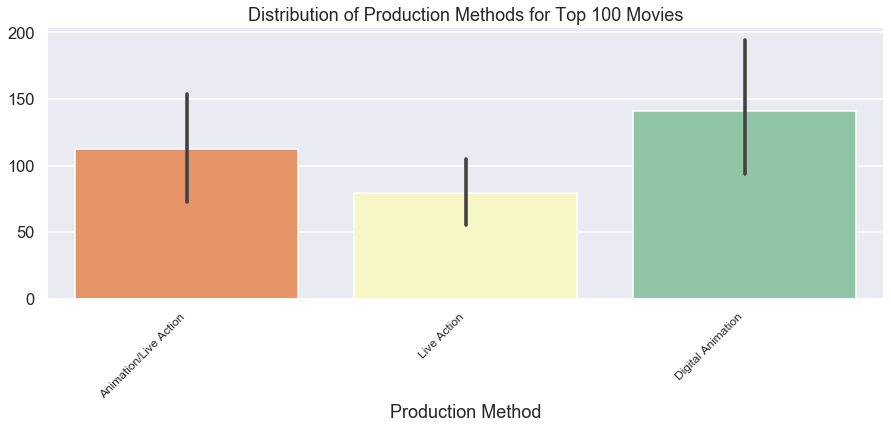

In [239]:
#plot distribution of 'production_method' for top 100 performers
x_values = production_method_vs_100_profit['production_method']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Methods for Top 100 Movies')
plt.xlabel('Production Method')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [240]:
#save
plt.savefig('production_method_distribution_100_barplot')

<Figure size 432x288 with 0 Axes>

Again, in term of worldwide_profit:

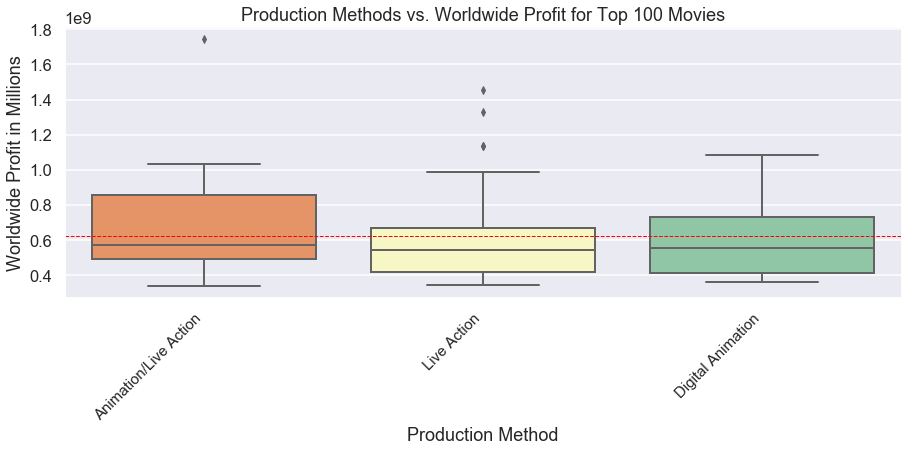

In [241]:
#plot 'production_method' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = production_method_vs_100_profit['production_method'], 
            y = production_method_vs_100_profit['worldwide_profit'],
            palette = 'Spectral')

#draw mean()
plt.axhline(production_method_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Production Methods vs. Worldwide Profit for Top 100 Movies')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [242]:
#save
plt.savefig('production_method_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

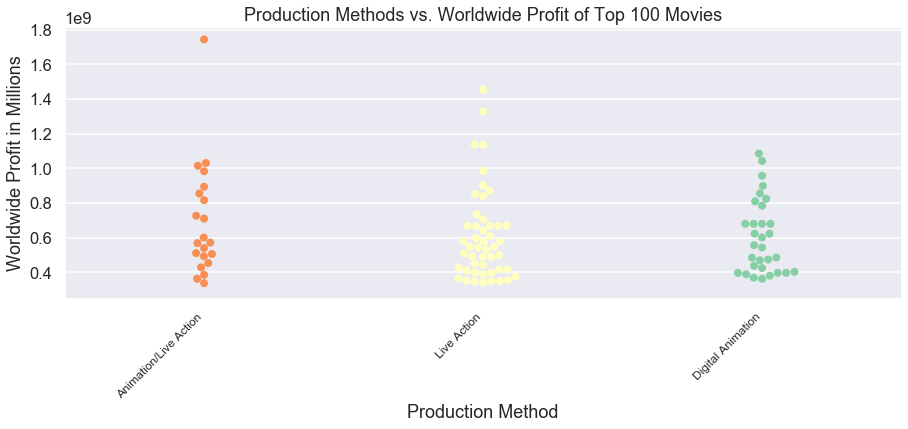

In [243]:
#plot all 'production_method' with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'production_method',
              y = 'worldwide_profit',
              hue = 'production_method',
              data = production_method_vs_100_profit,
              s = 8, palette = 'Spectral')

#set labels
plt.title('Production Methods vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [244]:
#save
plt.savefig('production_method_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

In [245]:
#get descriptive statistics for 'Action' worldwide_gross
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Animation/Live Action', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            21.000000
mean      692374419.476190
std       325430502.390983
min       337592267.000000
25%       493144660.000000
50%       571846894.000000
75%       855135598.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

In [246]:
#get descriptive statistics for 'Live Action' worldwide_gross
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Live Action', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            48.000000
mean      606671055.041667
std       260215276.596360
min       341514650.000000
25%       415796692.750000
50%       545798044.500000
75%       669215485.750000
max      1454943967.000000
Name: worldwide_profit, dtype: object

In [247]:
#get descriptive statistics for 'Animation' worldwide_gross
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Digital Animation', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            31.000000
mean      606721554.096774
std       212403375.459509
min       362846291.000000
25%       413976706.500000
50%       557483611.000000
75%       732487670.000000
max      1085631140.000000
Name: worldwide_profit, dtype: object

* The average worldwide profit for Animation/Live Action production method is 692M.
* The average worldwide profit for Live Action production method is 606M.
* The average worldwide profit for Digital Animation production method is 606M.

We see that Animation/Live Action generates the highest worldwide profit. However, the swarmplot shows that Live Action data is more consistent and reliable while Animation/Live Action has 1 powerful outlier. We'll look more into this later when considering popularity and rating.

<Figure size 1080x1080 with 0 Axes>

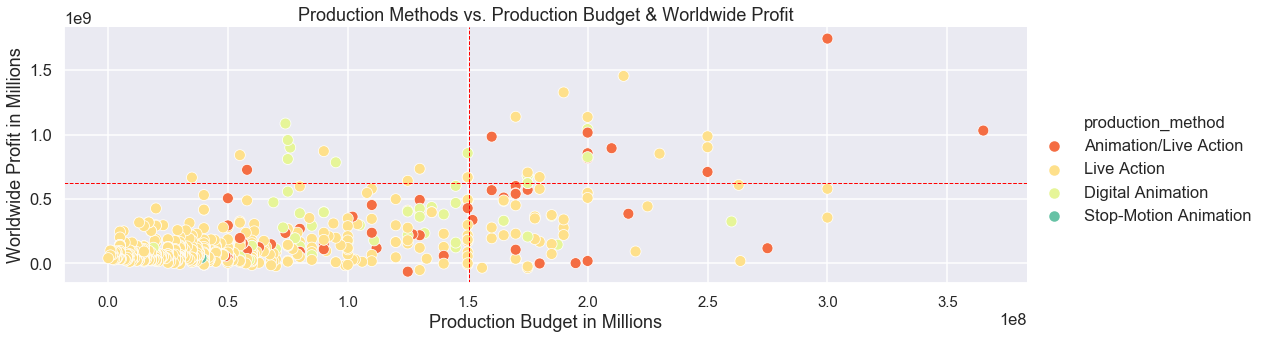

In [248]:
#plot all 'production_method' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'production_method',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(budget_vs_100_profit['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Production Methods vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [249]:
#save
plt.savefig('production_method_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [250]:
#get descriptive statistics for 'Animation/Live Action' production_budget
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Animation/Live Action', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           21.000000
mean     175904761.904762
std       72402972.840834
min       50000000.000000
25%      150000000.000000
50%      170000000.000000
75%      200000000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [251]:
#get descriptive statistics for 'Animation/Live Action' worldwide_profit
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Animation/Live Action', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            21.000000
mean      692374419.476190
std       325430502.390983
min       337592267.000000
25%       493144660.000000
50%       571846894.000000
75%       855135598.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

For Animation/Live Action, the average budget is 175M.

## Question 3: Can popularity or words of mouth, in term of rating and number of votes, affect the performance of a movie?

The assumption is that positive word of mouth has an enormous effect on the success of the movie. Does having a high score in popularity' or average rating means higher profit? By answering this question, we can be prepared to get our movies reviewed by as many people and critics as possible.

### Popularity

First let's look at popularity scores of both General Movies and Top 100 Movies groups. This can help us validate our previous decision on genre, source, creative type, and production method.

In [252]:
#get the attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

In [253]:
#create sub dataset for 'popularity' and 'average_rating'
#all movies
rating_vs_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes', 'worldwide_profit',
                           'genre', 'source', 'creative_type', 'production_method']]

#top 100 performers
rating_vs_100_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes', 'worldwide_profit',
                               'genre', 'source', 'creative_type', 'production_method']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]

#worst 100 performers
rating_vs_bottom100_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes', 'worldwide_profit',
                               'genre', 'source', 'creative_type', 'production_method']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = True)[:100]

In [254]:
rating_vs_profit.head(10)

,movie,popularity,average_rating,num_votes,worldwide_profit,genre,source,creative_type,production_method
0,Avengers: Age of Ultron,44.383,7.3,665594,1031099202,Action,Based on Comic/Graphic Novel,Super Hero,Animation/Live Action
1,Avengers: Infinity War,80.773,8.5,670926,1744540523,Action,Based on Comic/Graphic Novel,Super Hero,Animation/Live Action
2,Justice League,34.953,6.5,329135,355945209,Action,Based on Comic/Graphic Novel,Super Hero,Live Action
3,Spectre,30.318,6.8,352504,579500760,Action,Based on Fiction Book/Short Story,Contemporary Fiction,Live Action
4,The Dark Knight Rises,26.220,8.4,1387769,852228107,Action,Based on Comic/Graphic Novel,Super Hero,Live Action
5,Solo: A Star Wars Story,29.502,7.0,226243,118151347,Adventure,Spin-Off,Science Fiction,Animation/Live Action
6,John Carter,18.549,6.6,241792,19078100,Adventure,Based on Fiction Book/Short Story,Science Fiction,Live Action
7,Tangled,21.511,7.8,366366,325727091,Musical,Based on Folk Tale/Legend/Fairytale,Kids Fiction,Digital Animation
8,Captain America: Civil War,39.137,7.8,583507,901918521,Action,Based on Comic/Graphic Novel,Super Hero,Live Action
9,Batman v Superman: Dawn of Justice,28.088,6.5,576909,609395091,Action,Based on Comic/Graphic Novel,Super Hero,Live Action


Does having a high score in 'popularity' or 'average_rating' means higher profit?

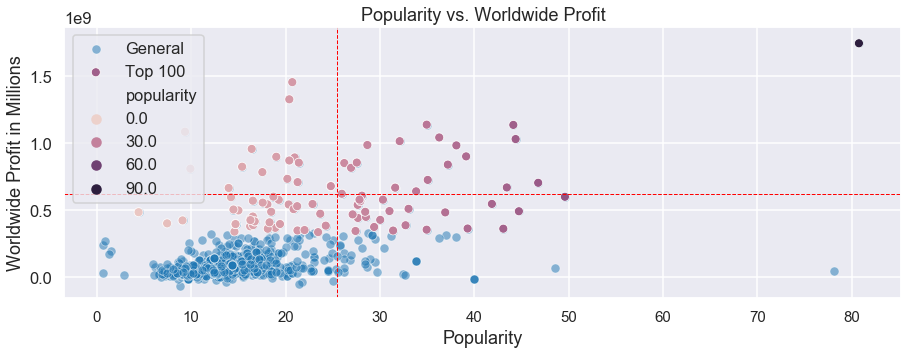

In [255]:
#plot 'popularity' vs. 'worldwide_profit'
plt.figure(figsize = (15, 5))

#popularity
sns.scatterplot(x = rating_vs_profit['popularity'],
                      y = rating_vs_profit['worldwide_profit'],
                      label = 'General', alpha = 0.5)

sns.scatterplot(x = rating_vs_100_profit['popularity'],
                      y = rating_vs_profit['worldwide_profit'],
                      hue = rating_vs_profit['popularity'],
                      label = 'Top 100')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')

plt.axvline(rating_vs_100_profit['popularity'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Popularity vs. Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')
plt.legend(loc='upper left')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [256]:
#save
plt.savefig('popularity_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

In [257]:
#top 100 movies
rating_vs_100_profit['popularity'].mean()

25.48723

In [258]:
#compare with bottom 100 movies that lost money
rating_vs_bottom100_profit['popularity'].mean()

13.25833

Successful top 100 movies score a 25 on average while the bottom 100 score a 13.2. 

We see that many of the Top 100 Movies as well as the General Movies score above 25 yet their worldwide profits have a big difference. It looks like we don't have much of a correlation here. Let's look at lmplot to see if we have a linear relationship between popularity and worldwide profit and calculate its Pearson correlation coefficient.

<Figure size 1080x360 with 0 Axes>

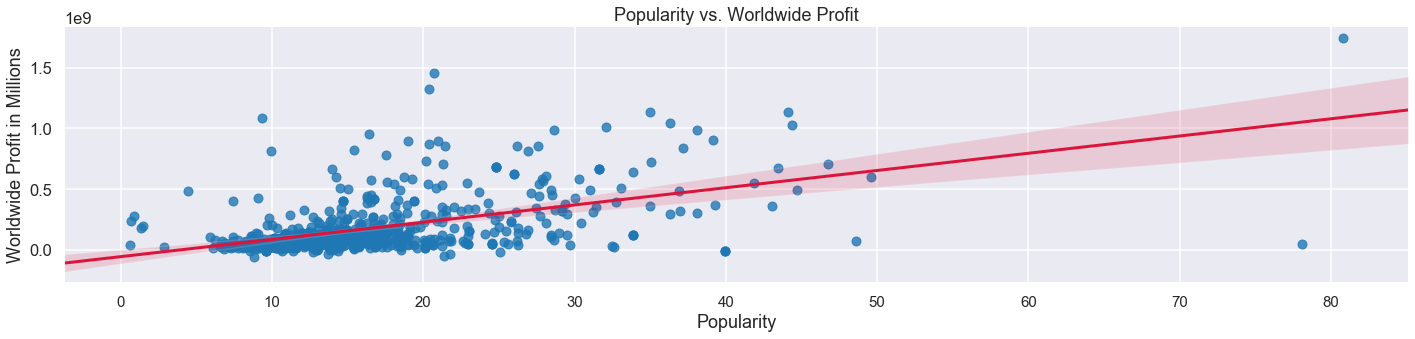

In [259]:
#plot 'popularity' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'popularity',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Popularity vs. Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [260]:
#save
plt.savefig('popularity_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

In [261]:
#get Pearson correlation coefficient
print('The Pearson correlation coefficient is:', r2(full_df['popularity'], full_df['worldwide_profit']))

The Pearson correlation coefficient is: 0.27492277075270216


* r2 = 0.274
* Popularity is positively correlated with worldwide profit.
* Top 100 Movies score a 25 on average.
* Bottom 100 Movies score a 13.2 on average.

There is a positive correlation between 'popularity' and 'worldwide_profit'.

There is a big difference between top 100 and bottom 100. Hence, the correlation between popularity score and commercial success is positive and we recommend Microsoft pay attention to this demand.

<Figure size 1080x1080 with 0 Axes>

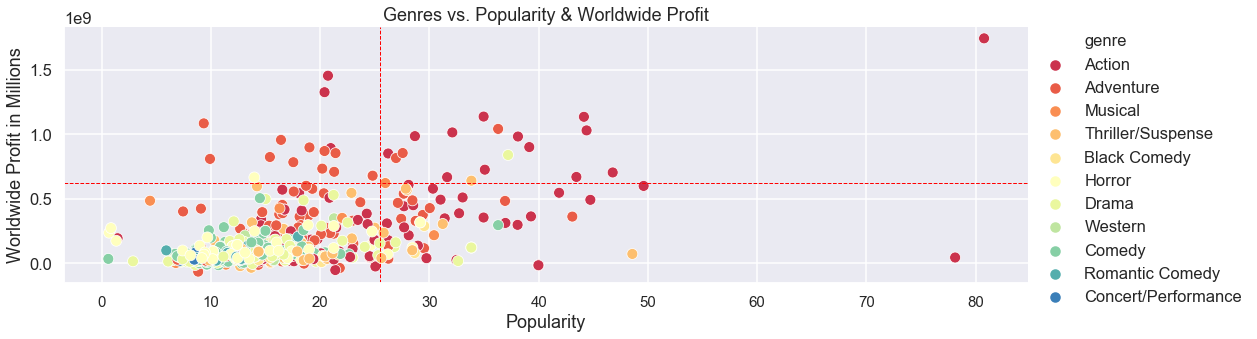

In [262]:
#plot all 'genre' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'genre',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['popularity'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genres vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [263]:
#save
plt.savefig('genre_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [264]:
rating_vs_100_profit[['movie', 'genre', 'popularity']].sort_values(by = 'popularity', ascending = False)[:5]

,movie,genre,popularity
1,Avengers: Infinity War,Action,80.773
60,Guardians of the Galaxy,Action,49.606
52,Spider-Man: Homecoming,Action,46.775
111,Ant-Man and the Wasp,Action,44.729
0,Avengers: Age of Ultron,Action,44.383


We can see here again, Action and Adventure are not only the highgest grossing genres but also the most popular genres.

<Figure size 1080x1080 with 0 Axes>

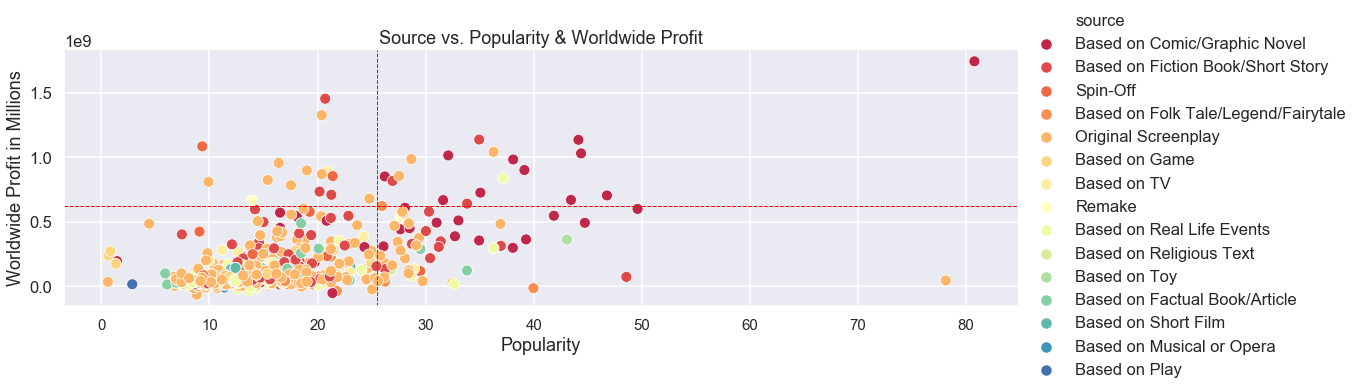

In [265]:
#plot all 'source' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'source',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['popularity'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Source vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [266]:
#save
plt.savefig('source_vs_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [267]:
rating_vs_100_profit[['movie', 'source', 'popularity']].sort_values(by = 'popularity', ascending = False)[:5]

,movie,source,popularity
1,Avengers: Infinity War,Based on Comic/Graphic Novel,80.773
60,Guardians of the Galaxy,Based on Comic/Graphic Novel,49.606
52,Spider-Man: Homecoming,Based on Comic/Graphic Novel,46.775
111,Ant-Man and the Wasp,Based on Comic/Graphic Novel,44.729
0,Avengers: Age of Ultron,Based on Comic/Graphic Novel,44.383


Same with source Based on Comic/Graphic Novel which score very high on both popularity range and worldwide profit.

<Figure size 1080x1080 with 0 Axes>

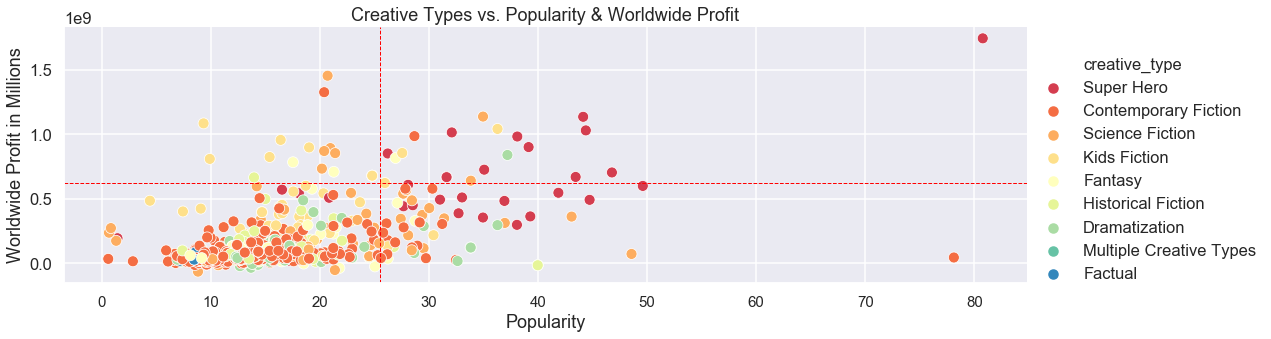

In [268]:
#plot all 'creative_type' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'creative_type',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['popularity'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Creative Types vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [269]:
#save
plt.savefig('creative_type_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [270]:
rating_vs_100_profit[['movie', 'creative_type', 'popularity']].sort_values(by = 'popularity', ascending = False)[:5]

,movie,creative_type,popularity
1,Avengers: Infinity War,Super Hero,80.773
60,Guardians of the Galaxy,Super Hero,49.606
52,Spider-Man: Homecoming,Super Hero,46.775
111,Ant-Man and the Wasp,Super Hero,44.729
0,Avengers: Age of Ultron,Super Hero,44.383


Super Hero takes a lead. To go back to worldwide profit analysis, although Contemporary Fiction generates higher profit than Super Hero, based on popularity, we recommend that we go with Super Hero.

<Figure size 1080x1080 with 0 Axes>

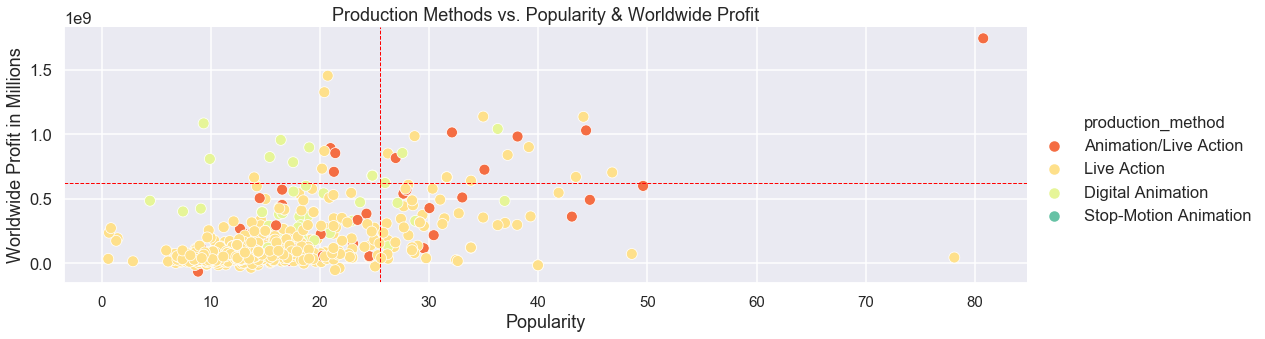

In [271]:
#plot all 'production_method' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'production_method',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['popularity'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Production Methods vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [272]:
#save
plt.savefig('production_method_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [273]:
rating_vs_100_profit[['movie', 'production_method', 'popularity']].sort_values(by = 'popularity', ascending = False)[:5]

,movie,production_method,popularity
1,Avengers: Infinity War,Animation/Live Action,80.773
60,Guardians of the Galaxy,Animation/Live Action,49.606
52,Spider-Man: Homecoming,Live Action,46.775
111,Ant-Man and the Wasp,Animation/Live Action,44.729
0,Avengers: Age of Ultron,Animation/Live Action,44.383


Action/ Adventure genre, based on comic graphic/ novel source, Super Hero creative type, Animation/Live Action are once again the general public's favorite.

We can explain that the success of Super Hero creative type is in large part due to the popularity of its early superhero comics, newspaper comic-strips, pulp magazines and many other sources. These movies have all of the elements of action, adventure, science fiction, and fantasy, all of them are the top creative types that generate the highest worldwide profit (see Question 1). Action/ Adventure/ Super Hero movies also do extremely well due to the large budget for special effects or CGI, production design, and first-class casting, all of which are features we wish to investigate further in future works.

### Average Rating 

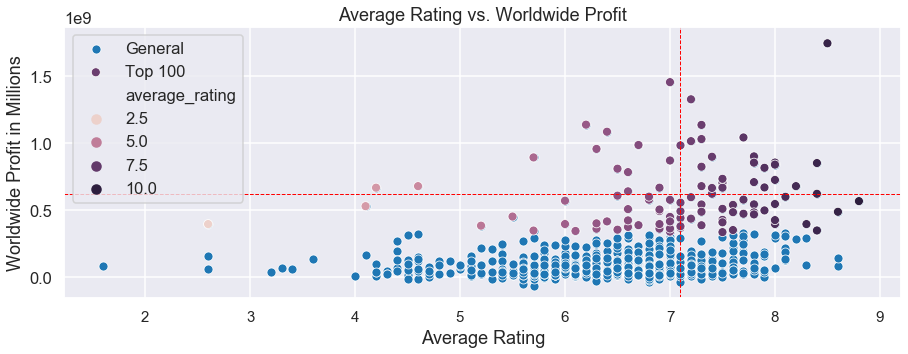

In [274]:
#plot 'average_rating' vs. 'worldwide_profit'
plt.figure(figsize = (15, 5))

#average_rating for all movies
sns.scatterplot(x = rating_vs_profit['average_rating'],
                      y = rating_vs_profit['worldwide_profit'],
                      label = 'General')

#average_rating for top 100 performers
sns.scatterplot(x = rating_vs_100_profit['average_rating'],
                      y = rating_vs_profit['worldwide_profit'],
                      hue = rating_vs_100_profit['average_rating'],
                      label = 'Top 100')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')

plt.axvline(rating_vs_100_profit['average_rating'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Average Rating vs. Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit in Millions')
plt.legend(loc='upper left')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [275]:
#save
plt.savefig('average_rating_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

In [276]:
#top 100 movies
rating_vs_100_profit['average_rating'].mean()

7.093999999999999

In [277]:
#compare with bottom 100 movies that lost money
rating_vs_bottom100_profit['average_rating'].mean()

6.144999999999999

Successful top 100 movies score on average a 7 while in general, including movies that are not profitable, score a 6.1. 

<Figure size 1080x360 with 0 Axes>

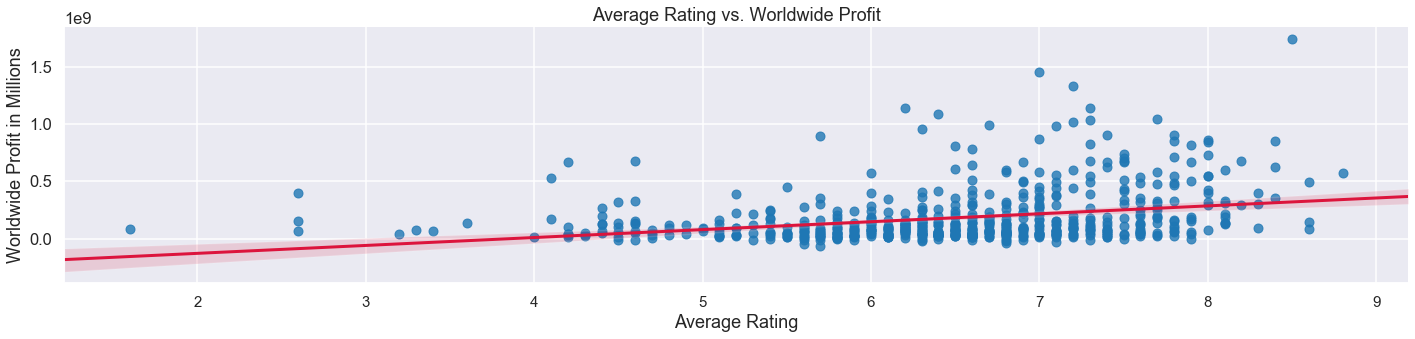

In [278]:
#plot 'average_rating' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'average_rating',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Average Rating vs. Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [279]:
#save
plt.savefig('rating_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

In [280]:
#get Pearson correlation coefficient
print('The Pearson correlation coefficient is:', r2(full_df['average_rating'], full_df['worldwide_profit']))

The Pearson correlation coefficient is: 0.0896791486923474


We can see here that the rating and worldwide profit is weakly correlated to each other with Pearson correlation coefficient of 0.089. With social media and internet surveys, ratings by the general public are gaining more influence but we found that its influence isn't as strong here.

* Top 100 Movies score a 7.1 on average.
* General Movies score a 6.4 on average.
* Bottom 100 Movies score a 6.1 on average.

The average rating between the Top 100 Movies and the Bottom 100 Movies is not that different.

<Figure size 1080x1080 with 0 Axes>

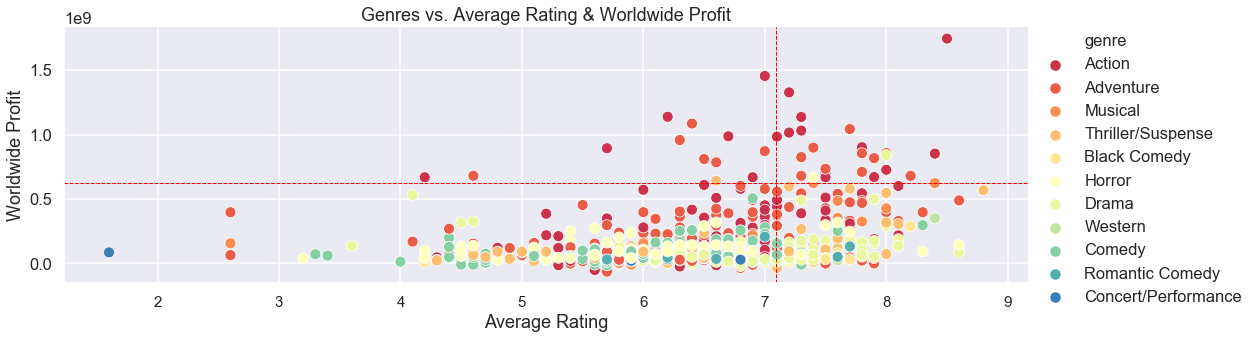

In [281]:
#plot all 'genre' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'genre',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['average_rating'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genres vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [282]:
#save
plt.savefig('genre_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [283]:
rating_vs_100_profit[['movie', 'genre', 'average_rating']].sort_values(by = ['average_rating'], ascending = False)[:5]

,movie,genre,average_rating
75,Inception,Thriller/Suspense,8.8
72,Interstellar,Adventure,8.6
1,Avengers: Infinity War,Action,8.5
147,Django Unchained,Western,8.4
54,Coco,Musical,8.4


As the weak r2-value indicated, although there is a positive correlation between rating and worldwide profit, it is not by much. 


<Figure size 1080x1080 with 0 Axes>

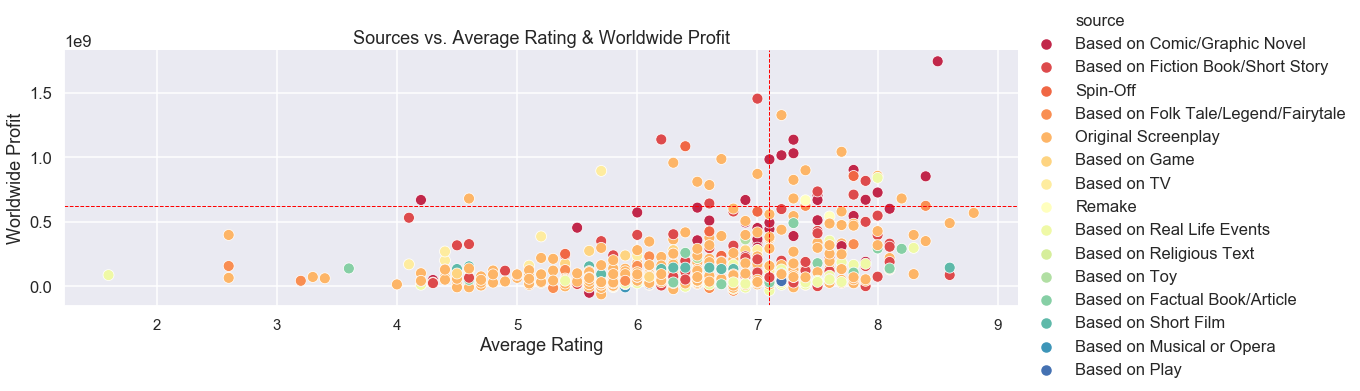

In [284]:
#plot all 'source' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'source',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['average_rating'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Sources vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [285]:
#save
plt.savefig('source_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [286]:
rating_vs_100_profit[['movie','source', 'average_rating']].sort_values(by = ['average_rating'], ascending = False)[:5]

,movie,source,average_rating
75,Inception,Original Screenplay,8.8
72,Interstellar,Original Screenplay,8.6
1,Avengers: Infinity War,Based on Comic/Graphic Novel,8.5
147,Django Unchained,Original Screenplay,8.4
54,Coco,Based on Folk Tale/Legend/Fairytale,8.4


<Figure size 1080x1080 with 0 Axes>

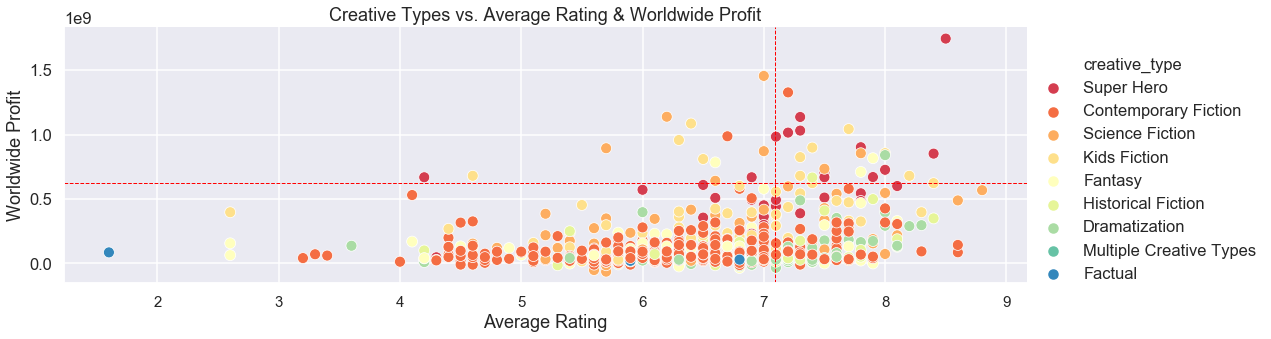

In [287]:
#plot all 'creative_type' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'creative_type',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['average_rating'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Creative Types vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [288]:
#save
plt.savefig('creative_type_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [289]:
rating_vs_100_profit[['movie', 'creative_type', 'average_rating']].sort_values(by = ['average_rating'], ascending = False)[:5]

,movie,creative_type,average_rating
75,Inception,Science Fiction,8.8
72,Interstellar,Science Fiction,8.6
1,Avengers: Infinity War,Super Hero,8.5
147,Django Unchained,Historical Fiction,8.4
54,Coco,Kids Fiction,8.4


<Figure size 1080x1080 with 0 Axes>

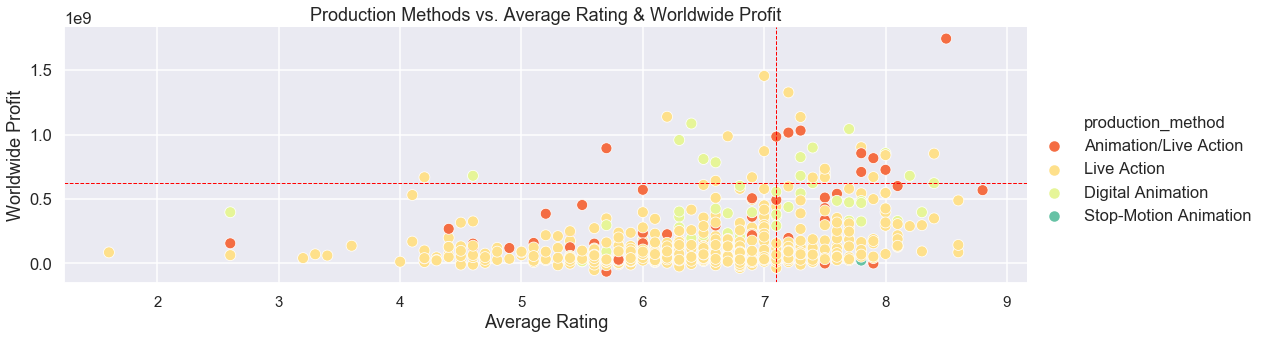

In [290]:
#plot all 'production_method' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'production_method',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(budget_vs_100_profit['worldwide_profit'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.axvline(rating_vs_100_profit['average_rating'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Production Methods vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [291]:
#save
plt.savefig('production_method_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [292]:
rating_vs_100_profit[['movie', 'production_method', 'average_rating']].sort_values(by = ['average_rating'], ascending = False)[:5]

,movie,production_method,average_rating
75,Inception,Animation/Live Action,8.8
72,Interstellar,Live Action,8.6
1,Avengers: Infinity War,Animation/Live Action,8.5
147,Django Unchained,Live Action,8.4
54,Coco,Digital Animation,8.4


Animation/ Live Action is our highest rated production method hence is our recommendation for our movie.

As we can see:
* Thriller/Suspense is highest rated, not Action/ Adventure
* Original Screen Play is highest rated, not Based on Comic Graphic/ Novel
* Science Fiction is highest rated, not Super Hero
* Only Animation/ Live Action remains the consistent.

The results from different analyses are mixed for this one:
* Consumer behavior expert Associate Professor François Carrillat from UTS Business School advises that we should focus our effort on getting our movies reviewed by as many critics as possible instead of the public audience (Staff, 2017). Critics, according to many researchers, have a dual role, where they both influence consumers' movie choice and predict box office performance by reflecting moviegoers' tastes (Staff). A Wall Street Journal article noted that reviews are a good predictor of box office performance, reporting that one-third of all moviegoers see movies based primarily on favorable reviews by critics (Stimpert, 2008).
* On the contrary, more research into critic reviews revealed that the average Metacritic score, i.e. average of film critics out of 100, for profitable films was 55 and for unprofitable movies it was 49 (Follows, 2020). Similarly, when we look at this plot, we see that the successful top 100 movies score on average a 7.1 while in general, including movies that are not profitable, score a 6.4, and the bottom 100 is 6.1. Not very much different.

Despite the weak influence of consumer opinions on the movie, we still suggest Microsoft incorporate online rating into its marketing as a research tool and source of information to predict what kind of movie to create in the future.